In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import kagglehub
path = 'titanic3.xls' 

# Task 1: Data Loading and Initial Exploration
Lecture material: Lecture 3, slides 4–8, 10, and 11.
- Load the dataset into a Pandas DataFrame.
- Perform basic exploratory data analysis (EDA) to comprehend the structure and characteristics of the data.
Note: Your analysis should include appropriate exploratory statistics and visualizations

In [168]:
df = pd.read_excel(path)

In [169]:
df.shape

(1309, 14)

Our dataset contains 1,309 entries, however, historical records indicate that the Titanic had a total of 2,240 passengers, of whom 1,510 lost their lives in 1912.

In [170]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [171]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [172]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Variables of the Dataset**
- pclass: Passenger class, represented as an integer from 1 to 3, indicating socio-economic status (1 = First Class, 2 = Second Class, 3 = Third Class).
- survived: Survival status of the passenger, where 1 = Survived and 0 = Did not survive, this is also out targe variable.
- name: Full name of the passenger, including title (e.g., Mr., Mrs., Miss), as a string.
- sex: Gender of the passenger, recorded as a string (female or male).
- age: Age of the passenger as an float.
- sibsp: Number of siblings and spouses the passenger had aboard the Titanic, as an integer
- parch: Number of parents and children the passenger was traveling with, as an integer.
- fare: Amount paid for the ticket, as a float ranging from 0 to 512.329, measured in British Pounds.
- cabin: Cabin number assigned to the passenger, recorded as a string.
- embarked: The port where the passenger boarded the ship. The Titanic's route started at Southampton (S), then stopped at Cherbourg (C), followed by Queenstown (Q), before finally heading to New York.
- boat: Number of the lifeboat the passenger boarded, if they were rescued
- body:  If the passenger did not survive, this indicates the body identification number, if recovered, recorded as float.
- home.dest: Final destination of the passenger, indicating where they were traveling to, recorded as a string.
- ticket: passenger/s ticket

## Numerical variables

### Age

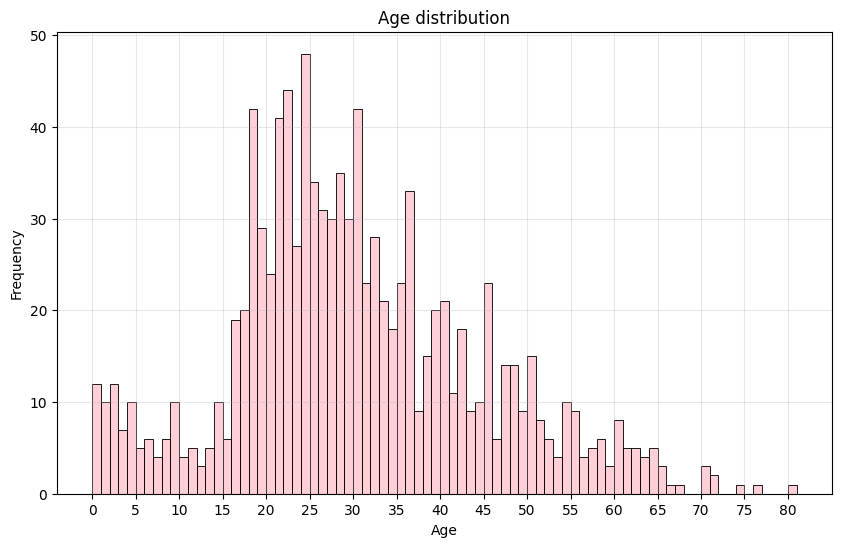

In [173]:
# frequency of age
plt.figure(figsize=(10, 6))
# we adapt the bins to the years
bins_survived = np.arange(0, df['age'].max() + 2) 
sns.histplot(data=df, x='age', bins=bins_survived, color='pink', binrange=(0, df['age'].max() + 1))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)
plt.show()



The age variable is a float, as we know that there could have been babies aboard the Titanic. The following graph shows the distribution of ages.

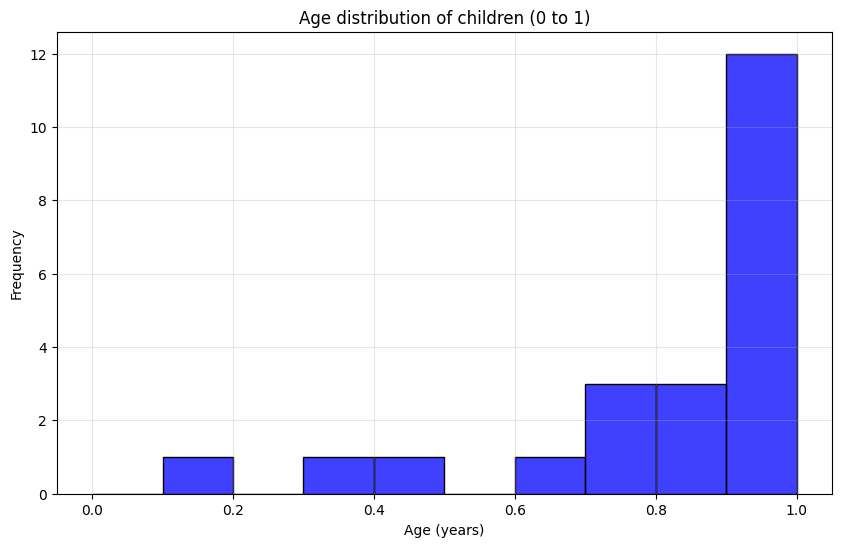

In [174]:
# frequency of babies
children_0_1 = df[(df['age'] >= 0) & (df['age'] <= 1)]
bins = np.arange(0, 1.1, 0.1)  
plt.figure(figsize=(10, 6))
sns.histplot(data=children_0_1, x='age', bins=bins, color='blue')
plt.title('Age distribution of children (0 to 1)')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

It is important to check whether individuals older than 1 year have decimal values in their ages.

In [175]:
older_than_one_year = df[df['age'] > 1]
ages_with_decimals = older_than_one_year['age'] % 1 != 0

print(f'Total number of people older than 1 year with decimals in their age: {ages_with_decimals.sum()}')

non_integer_ages = older_than_one_year[ages_with_decimals]
print('Rows where age does not end with .0:')
print(non_integer_ages[['age']])



Total number of people older than 1 year with decimals in their age: 33
Rows where age does not end with .0:
       age
173   32.5
222   28.5
224   45.5
512   32.5
516   36.5
568   18.5
584   32.5
692   18.5
727   70.5
741   22.5
758   36.5
796   40.5
797   40.5
847   23.5
919   18.5
924   34.5
960   34.5
977   20.5
992   30.5
1015  55.5
1066  28.5
1169  38.5
1171  14.5
1192  24.5
1225  60.5
1251  30.5
1263  11.5
1264  40.5
1285  32.5
1294  28.5
1301  45.5
1304  14.5
1306  26.5


As we can see, there are 33 individuals older than 1 year whose age has a decimal, specifically, all of these individuals have their age ending in .5. It is interesting to explore the survival status of these individuals

In [176]:
ages_with_decimals = older_than_one_year[older_than_one_year['age'] % 1 != 0]

total_individuals = len(ages_with_decimals)
print(f'Total number of individuals older than 1 year with ages ending in .5: {total_individuals}')

survival_status = ages_with_decimals['survived'].value_counts(normalize=True)

print(f'Proportion of survivors: {survival_status.get(1, 0)}')
print(f'Proportion of non-survivors: {survival_status.get(0, 0)}')


Total number of individuals older than 1 year with ages ending in .5: 33
Proportion of survivors: 0.06060606060606061
Proportion of non-survivors: 0.9393939393939394


Even though 94% of individuals whose age ends in .5 did not survive, this data could be more meaningful if the sample of individuals with this specific characteristic were larger. However, it's challenging to generalize this idea to the entire model.

In [177]:
age_metrics = {
    'mean': df['age'].mean(),
    'variance': df['age'].var(),
    'standard_deviation': df['age'].std(),
    'median': df['age'].median(),
    'mode': df['age'].mode()[0],  
    'min': df['age'].min(),
    'max': df['age'].max(),
    'count': df['age'].count(),  
    'missing_values': df['age'].isnull().sum() 
}

for metric, value in age_metrics.items():
    print(f'{metric.capitalize()}: {value}')


Mean: 29.8811345124283
Variance: 207.74897359969773
Standard_deviation: 14.413499699923602
Median: 28.0
Mode: 24.0
Min: 0.1667
Max: 80.0
Count: 1046
Missing_values: 263


Based on the previous data, the variance of the age distribution is relatively high, indicating a broad spread of ages within the dataset. Additionally, there are 263 missing values in the age column. However, this will be addressed later.

**Important**: For all the plots that compare a feature based on survival, it's better to use a proportion plot, as the feature is still imbalanced and this method more accurately reflects the relationship.

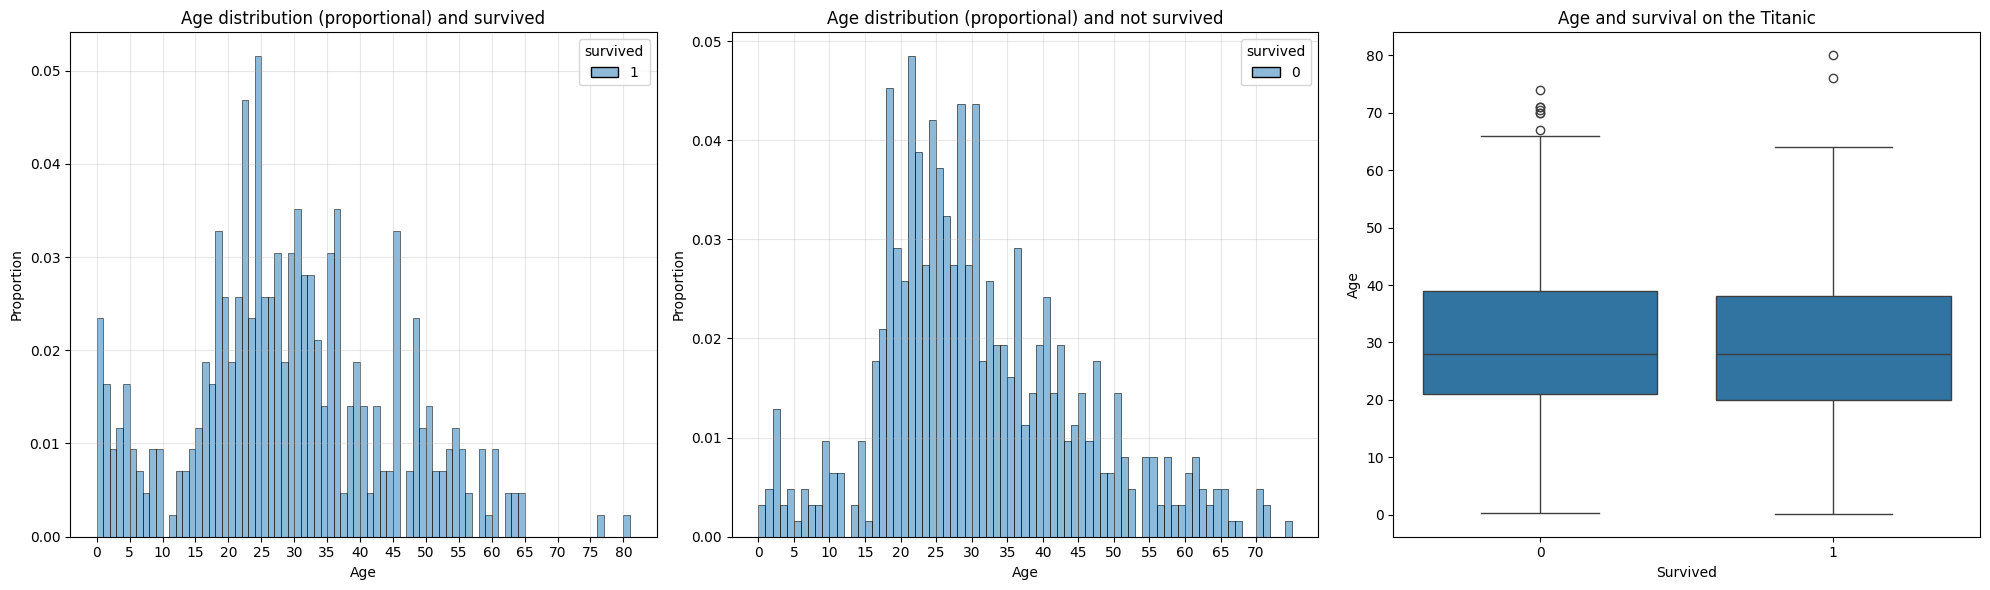

In [178]:
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

plt.figure(figsize=(20, 6))

# we make 1 bin per year, for easier visualization
bins_survived = np.arange(0, survived['age'].max() + 2)
bins_not_survived = np.arange(0, not_survived['age'].max() + 2)

## 1st plot: Age distribution and survived
plt.subplot(1, 3, 1)
sns.histplot(data=survived, x='age', bins=bins_survived, 
             stat='probability', color='green',
             binrange=(0, survived['age'].max() + 1), hue='survived')
plt.title('Age distribution (proportional) and survived')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(np.arange(0, survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

# 2nd plot: Age distribution and not survived
plt.subplot(1, 3, 2)
sns.histplot(data=not_survived, x='age', bins=bins_not_survived, 
             stat='probability', color='red',
             binrange=(0, not_survived['age'].max() + 1), hue='survived')
plt.title('Age distribution (proportional) and not survived')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(np.arange(0, not_survived['age'].max() + 1, 5))
plt.grid(True, alpha=0.3)

# 3rd plot: Boxplot - Age vs Survived
plt.subplot(1, 3, 3)
sns.boxplot(x='survived', y='age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age and survival on the Titanic')

plt.tight_layout()
plt.show()


Based on this, we observe a notable difference in the survival rates of individuals, with children between 0 and 10 years old having a higher chance of survival. On the other hand, older individuals, starting from 65 years and above, had a lower chance of survival. However, since the majority of the population falls between the ages of 15 and 40, this does not significantly impact the boxplots, and the mean age remains fairly stable between the survived and not survived groups. It might be interesting to remove the age variable and instead create a new categorical variable with the following age groups: below 15 years, between 15 and 50 years, and above 50 years.

### Fare

Fare represents the amount of money payed by a passenger individually

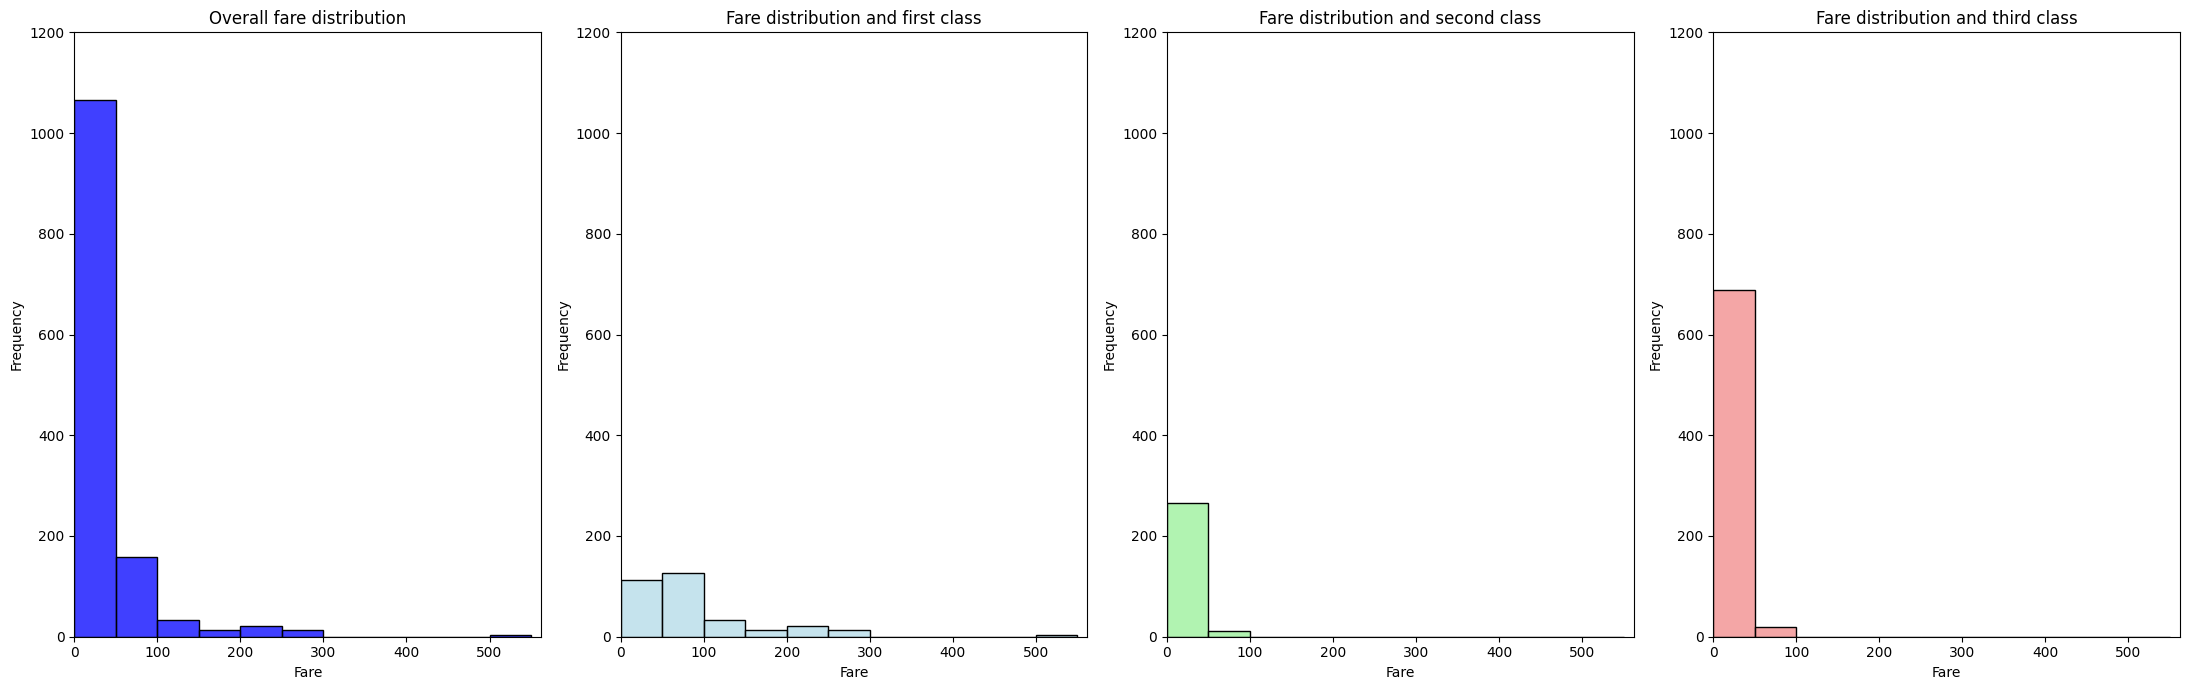

In [179]:
fig, axes = plt.subplots(1, 4, figsize=(22, 7))

bin_edges = range(0, int(df['fare'].max()) + 50, 50)

# fare distribution
sns.histplot(df['fare'], color='blue', ax=axes[0], bins=bin_edges)
axes[0].set_title('Overall fare distribution')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# fare distribution for class 1 (second plot)
sns.histplot(df[df['pclass'] == 1]['fare'], color='lightblue', ax=axes[1], bins=bin_edges, alpha=0.7)
axes[1].set_title('Fare distribution and first class')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

# fare distribution for class 2 (third plot)
sns.histplot(df[df['pclass'] == 2]['fare'], color='lightgreen', ax=axes[2], bins=bin_edges, alpha=0.7)
axes[2].set_title('Fare distribution and second class')
axes[2].set_xlabel('Fare')
axes[2].set_ylabel('Frequency')

# fare distribution for class 3 (fourth plot)
sns.histplot(df[df['pclass'] == 3]['fare'], color='lightcoral', ax=axes[3], bins=bin_edges, alpha=0.7)
axes[3].set_title('Fare distribution and third class')
axes[3].set_xlabel('Fare')
axes[3].set_ylabel('Frequency')

# apply the same x and y limits to all plots for consistency
max_fare = df['fare'].max()
axes[0].set_xlim(0, max_fare + 50)
axes[1].set_xlim(0, max_fare + 50)
axes[2].set_xlim(0, max_fare + 50)
axes[3].set_xlim(0, max_fare + 50)
axes[0].set_ylim(0, 1200)
axes[1].set_ylim(0, 1200)
axes[2].set_ylim(0, 1200)
axes[3].set_ylim(0, 1200)

plt.tight_layout()
plt.show()


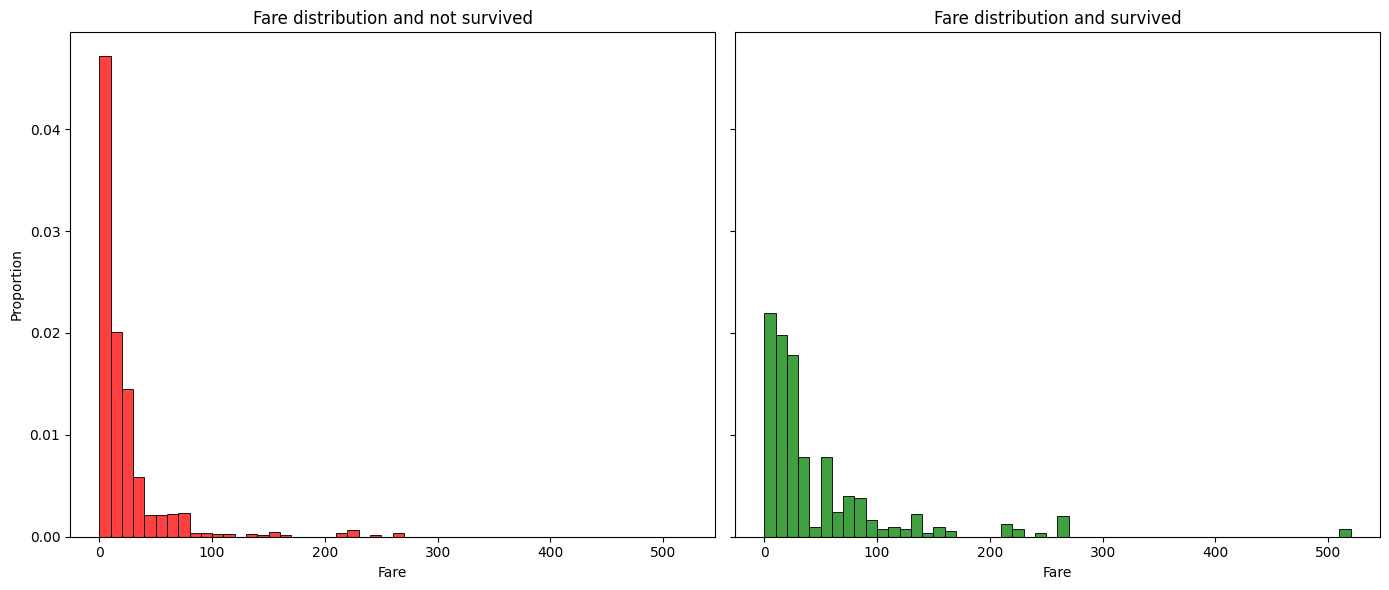

In [180]:
bin_width = 10  
max_fare = df['fare'].max()
bins = np.arange(0, max_fare + bin_width, bin_width)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True, sharex=True)

# compare the fare of those who survived and not survived
sns.histplot(df[df['survived'] == 0]['fare'], 
             bins=bins, color='red', stat='density', ax=axes[0])
axes[0].set_title('Fare distribution and not survived')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Proportion')

sns.histplot(df[df['survived'] == 1]['fare'], 
             bins=bins, color='green', stat='density', ax=axes[1])
axes[1].set_title('Fare distribution and survived')
axes[1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

In [181]:
# these values looks like outliers, 
max_fare = df['fare'].max()
person_max_fare = df[df['fare'] == max_fare]
print(person_max_fare)


     pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183    3   NaN                        

### Body

This is a clear case of data leakage because it directly indicates the outcome we are trying to predict, whether someone survived or not.

In [182]:
nobody_df = df.drop(columns=['body'])
print(nobody_df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')


### Parch

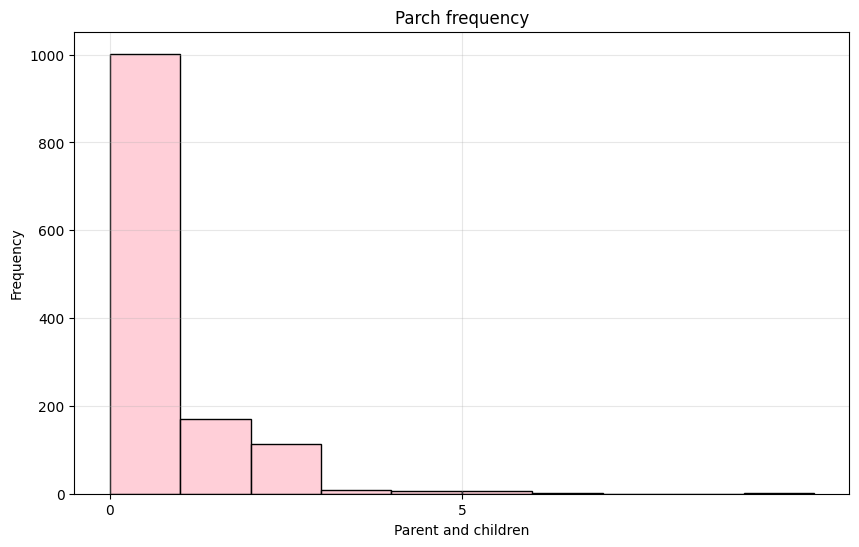

In [183]:
# frequency of parch
plt.figure(figsize=(10, 6))
bins_survived = np.arange(0, nobody_df['parch'].max() + 2) 
sns.histplot(data=nobody_df, x='parch', bins=bins_survived, color='pink', binrange=(0, nobody_df['parch'].max() + 1))
plt.title('Parch frequency')
plt.xlabel('Parent and children')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, nobody_df['parch'].max() + 1, 5))
plt.grid(True, alpha=0.3)
plt.show()

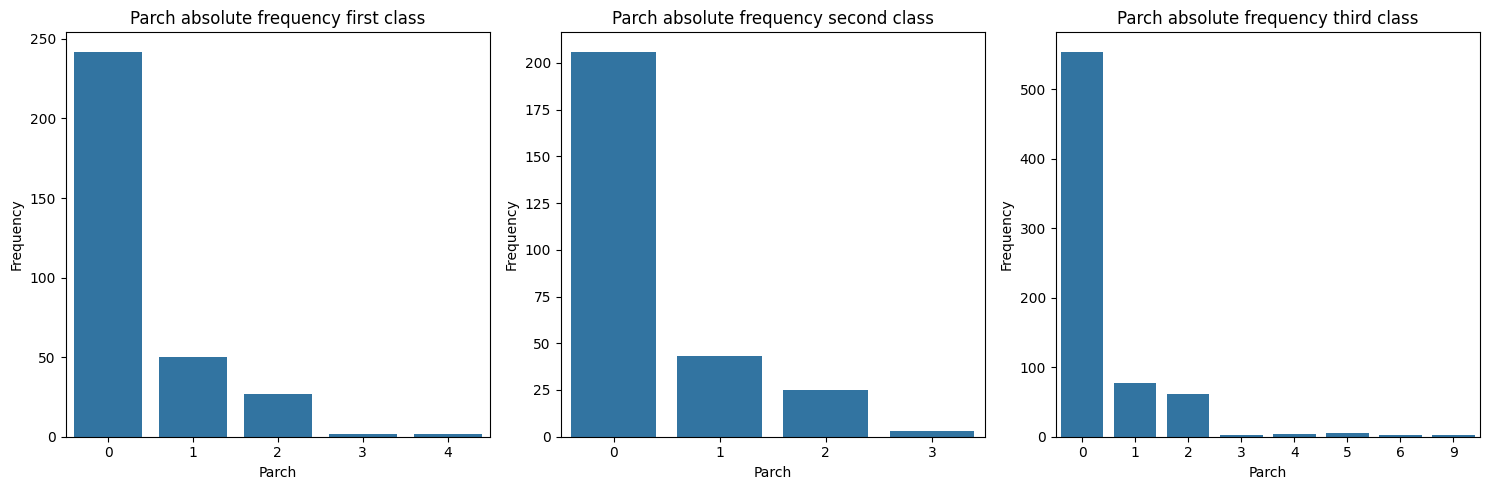

In [184]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  
sns.countplot(data=df[nobody_df['pclass'] == 1], x='parch')
plt.title('Parch absolute frequency first class')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)  
sns.countplot(data=df[nobody_df['pclass'] == 2], x='parch')
plt.title('Parch absolute frequency second class')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)  
sns.countplot(data=df[nobody_df['pclass'] == 3], x='parch')
plt.title('Parch absolute frequency third class')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


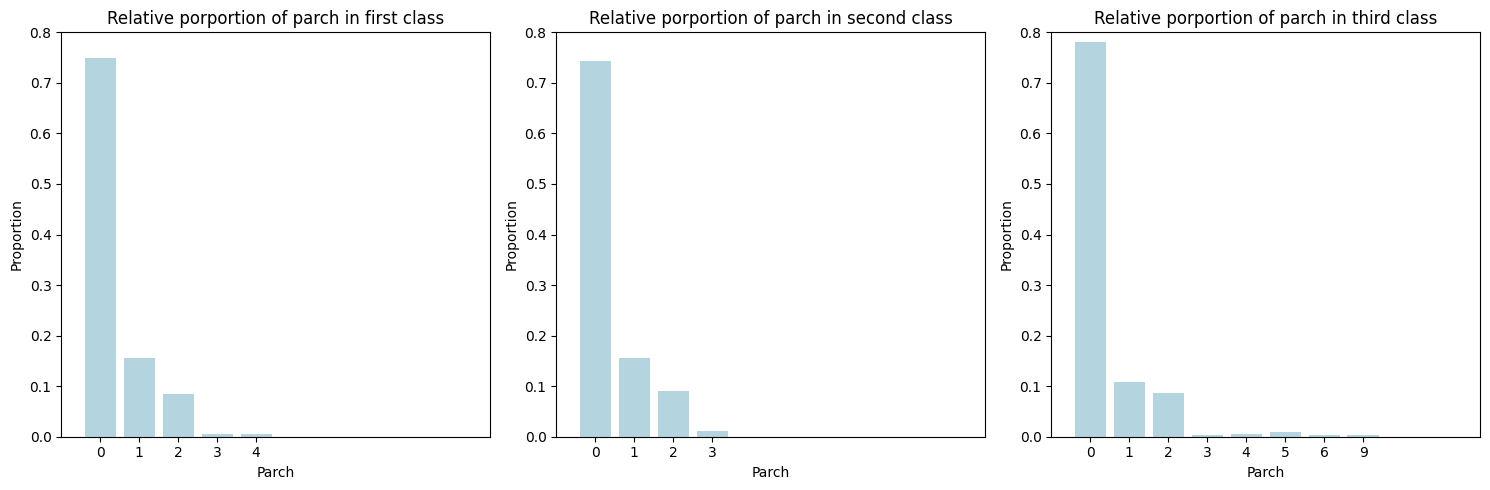

In [185]:
plt.figure(figsize=(15, 5))

class_data = df[nobody_df['pclass'] == 1]
parch_counts = class_data['parch'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 1)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)  
plt.title(f'Relative porportion of parch in first class')
plt.xlabel('Parch')
plt.ylabel('Proportion')

class_data = df[nobody_df['pclass'] == 2]
parch_counts = class_data['parch'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 2)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)  
plt.title(f'Relative porportion of parch in second class')
plt.xlabel('Parch')
plt.ylabel('Proportion')

class_data = df[nobody_df['pclass'] == 3]
parch_counts = class_data['parch'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 3)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)   
plt.title(f'Relative porportion of parch in third class')
plt.xlabel('Parch')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


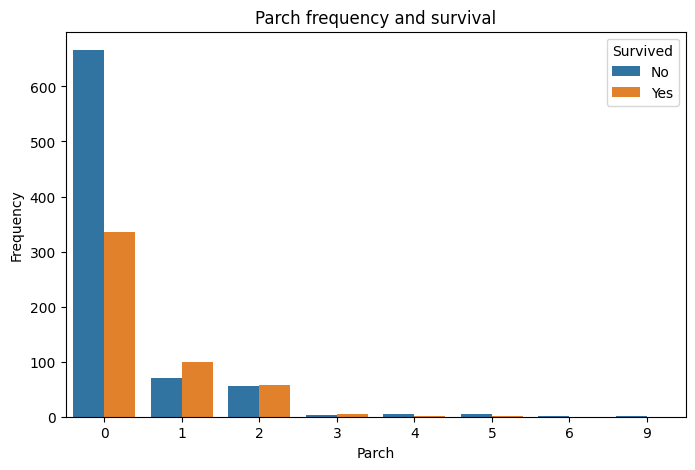

In [186]:
plt.figure(figsize=(8, 5))
sns.countplot(data=nobody_df, x='parch', hue='survived')
plt.title('Parch frequency and survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Sibsp

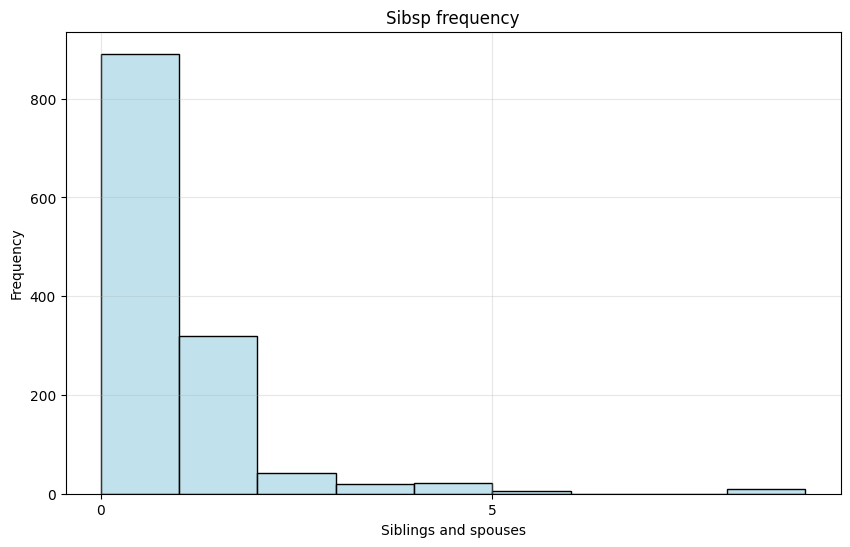

In [187]:
#  frequency of sibsp
plt.figure(figsize=(10, 6))
bins_survived = np.arange(0, nobody_df['sibsp'].max() + 2) 
sns.histplot(data=nobody_df, x='sibsp', bins=bins_survived, color='lightblue', binrange=(0, df['sibsp'].max() + 1))
plt.title('Sibsp frequency')
plt.xlabel('Siblings and spouses')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, nobody_df['sibsp'].max() + 1, 5))
plt.grid(True, alpha=0.3)
plt.show()

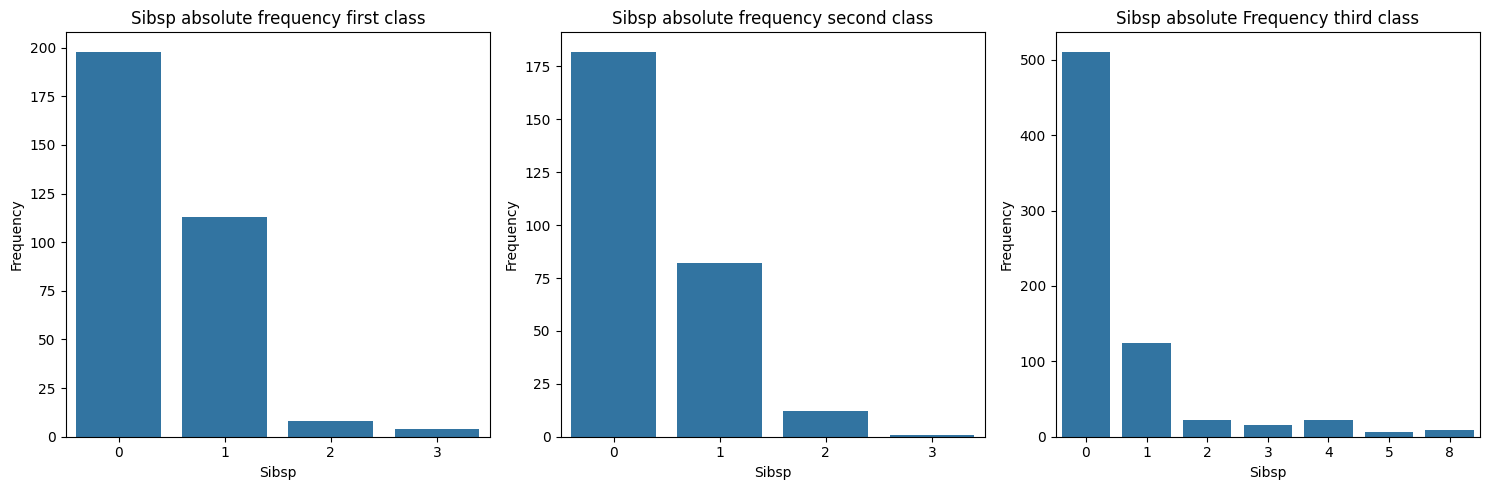

In [188]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  
sns.countplot(data=df[nobody_df['pclass'] == 1], x='sibsp')
plt.title('Sibsp absolute frequency first class')
plt.xlabel('Sibsp')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)  
sns.countplot(data=df[nobody_df['pclass'] == 2], x='sibsp')
plt.title('Sibsp absolute frequency second class')
plt.xlabel('Sibsp')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)  
sns.countplot(data=df[nobody_df['pclass'] == 3], x='sibsp')
plt.title('Sibsp absolute Frequency third class')
plt.xlabel('Sibsp')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


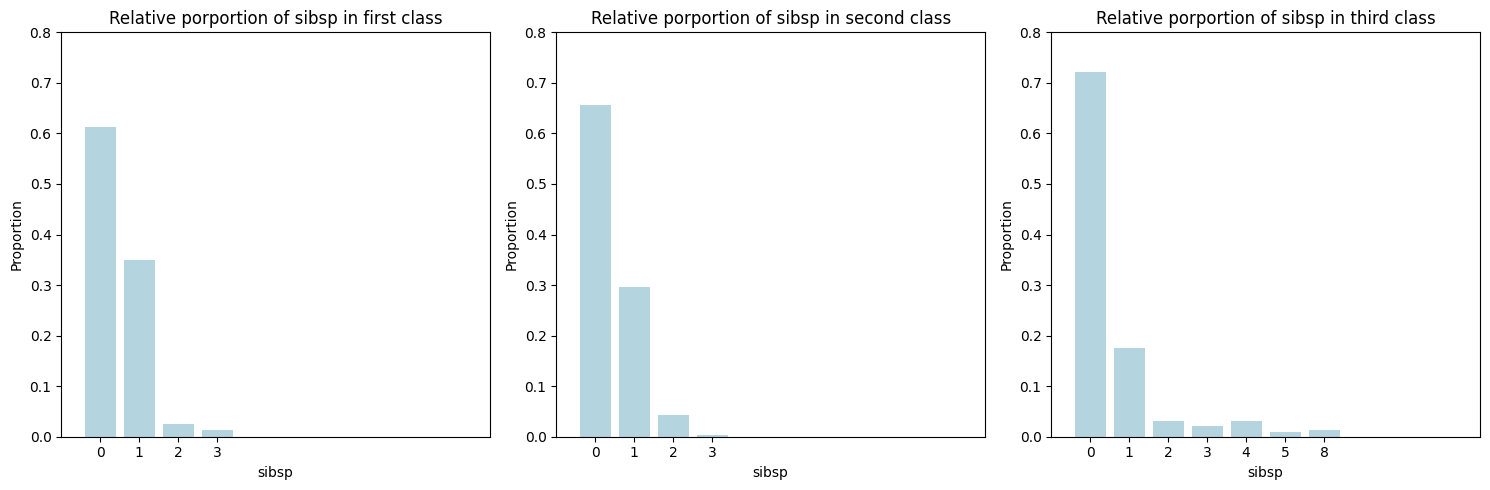

In [189]:
plt.figure(figsize=(15, 5))

class_data = df[nobody_df['pclass'] == 1]
parch_counts = class_data['sibsp'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 1)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)  
plt.title(f'Relative porportion of sibsp in first class')
plt.xlabel('sibsp')
plt.ylabel('Proportion')

class_data = df[nobody_df['pclass'] == 2]
parch_counts = class_data['sibsp'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 2)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)  
plt.title(f'Relative porportion of sibsp in second class')
plt.xlabel('sibsp')
plt.ylabel('Proportion')

class_data = df[nobody_df['pclass'] == 3]
parch_counts = class_data['sibsp'].value_counts(normalize=True).sort_index()
plt.subplot(1, 3, 3)
sns.barplot(x=parch_counts.index, y=parch_counts.values, color='lightblue')
plt.ylim(0, 0.8)  
plt.xlim(-1, 10)   
plt.title(f'Relative porportion of sibsp in third class')
plt.xlabel('sibsp')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


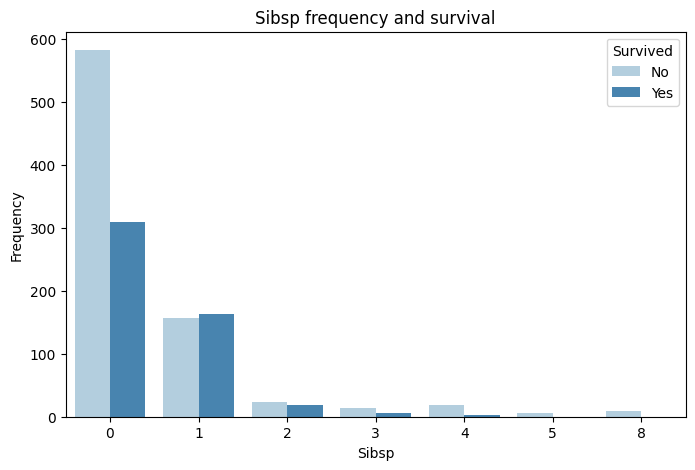

In [190]:
plt.figure(figsize=(8, 5))
sns.countplot(data=nobody_df, x='sibsp', hue='survived', palette='Blues')
plt.title('Sibsp frequency and survival')
plt.xlabel('Sibsp')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Sibsp + Parch

It may be beneficial for our model to introduce two new features derived from parch and sibsp: a boolean variable, 'alone', indicating whether a passenger was traveling alone, and another feature, 'relatives', representing the total number of family members on board.

In [191]:
# alone: 0/boolean 
nobody_df['alone'] = ((nobody_df['sibsp'] == 0) & (nobody_df['parch'] == 0)).astype(int)


In [192]:
# relatives: numerical
nobody_df['relatives'] = nobody_df['sibsp'] + nobody_df['parch']

In [193]:
print(nobody_df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat  \
0  29.0000      0      0   24160  211.3375       B5        S    2   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   

                         home.dest  alone  relatives  
0                     St Louis, MO      1        

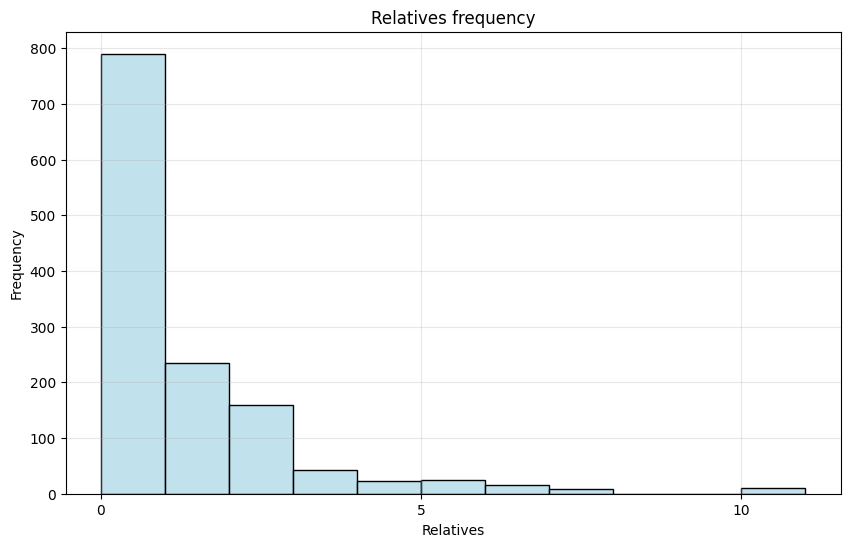

In [194]:
# Plot frequency of sibsp
plt.figure(figsize=(10, 6))
bins_survived = np.arange(0, nobody_df['relatives'].max() + 2) 
sns.histplot(data=nobody_df, x='relatives', bins=bins_survived, color='lightblue', binrange=(0, nobody_df['sibsp'].max() + 1))
plt.title('Relatives frequency')
plt.xlabel('Relatives')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, nobody_df['relatives'].max() + 1, 5))
plt.grid(True, alpha=0.3)
plt.show()

In [195]:
relatives_percentage = pd.crosstab(nobody_df['relatives'], nobody_df['survived'], normalize='index') * 100
relatives_percentage.columns = ['Did not survive (%)', 'Survived (%)']

# For 'alone' (0/1) by survival status with percentages
alone_percentage = pd.crosstab(nobody_df['alone'], nobody_df['survived'], normalize='index') * 100
alone_percentage.columns = ['Did not survive (%)', 'Survived (%)']

# Display the tables with percentages by level
print("Percentage distribution for 'relatives' by survival:")
print(relatives_percentage)

print("\nPercentage distribution for 'alone' by survival:")
print(alone_percentage)

Percentage distribution for 'relatives' by survival:
           Did not survive (%)  Survived (%)
relatives                                   
0                    69.746835     30.253165
1                    46.382979     53.617021
2                    43.396226     56.603774
3                    30.232558     69.767442
4                    72.727273     27.272727
5                    80.000000     20.000000
6                    75.000000     25.000000
7                   100.000000      0.000000
10                  100.000000      0.000000

Percentage distribution for 'alone' by survival:
       Did not survive (%)  Survived (%)
alone                                   
0                49.710983     50.289017
1                69.746835     30.253165


Passengers traveling alone had a significantly lower survival rate (30.25%) compared to those with at least one relative (50.29%), suggesting that family presence played a crucial role in survival. The highest survival rate (69.77%) was observed among those with three relatives, indicating that moderate family support may have facilitated evacuation. However, survival rates dropped for those with four or more relatives, with families of seven or ten experiencing 100% mortality. However, since there were fewer passengers in these larger family groups, it's harder to draw strong conclusions from their survival patterns. 

## Categorical Variables

- **Pclass**
- **Embarked**
- **Boat**
- **Sex**
- **Survived**

### Sex

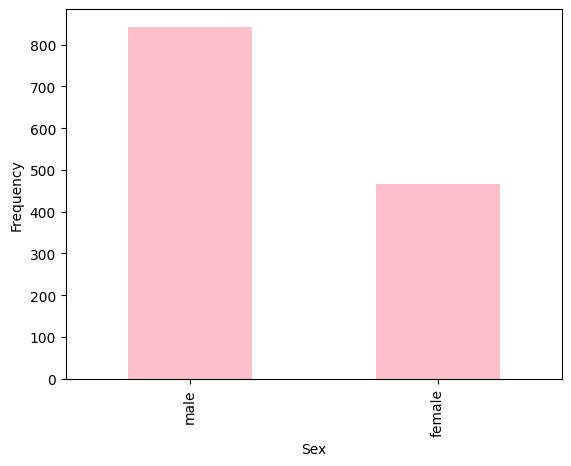

In [196]:
nobody_df['sex'].value_counts().plot(kind='bar', edgecolor = 'none', color = 'pink')
plt.title('')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

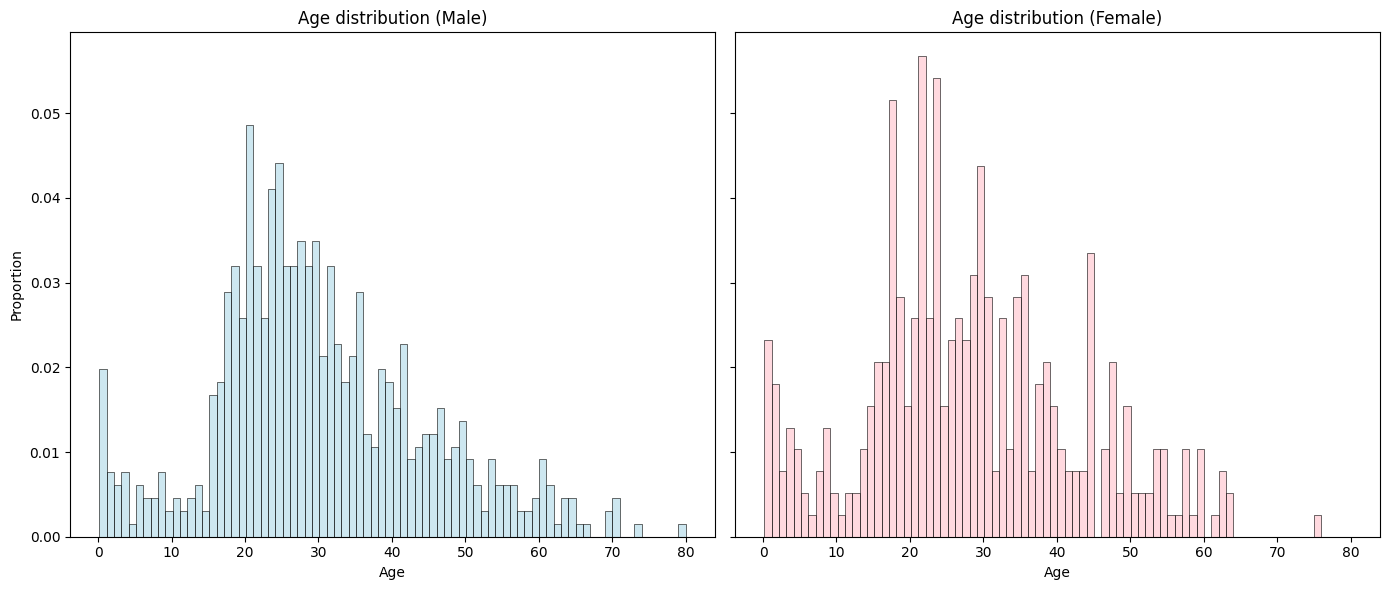

In [197]:
bins = np.linspace(nobody_df['age'].min(), nobody_df['age'].max(), 81)  
male_ages = df[nobody_df['sex'] == 'male']['age'].dropna()
female_ages = df[nobody_df['sex'] == 'female']['age'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(male_ages, bins=bins, color='lightblue', alpha=0.6, stat='probability', ax=axes[0])
axes[0].set_title('Age distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Proportion')

sns.histplot(female_ages, bins=bins, color='pink', alpha=0.6, stat='probability', ax=axes[1])
axes[1].set_title('Age distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

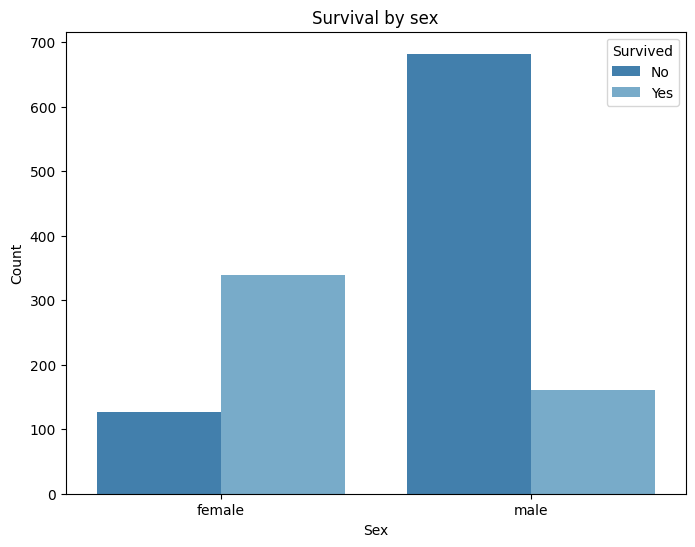

In [198]:
plt.figure(figsize=(8, 6))
sns.countplot(data=nobody_df, x='sex', hue='survived', palette='tab20c')
plt.title('Survival by sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

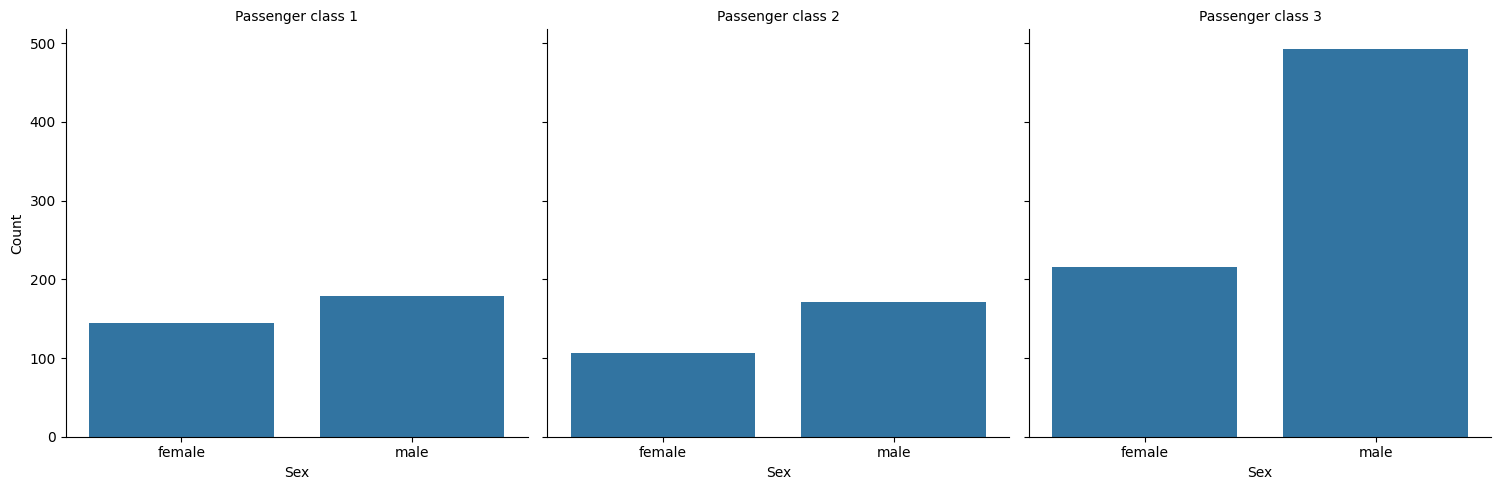

In [199]:
graph = sns.catplot(data=df, x='sex', col='pclass', kind='count')

graph.set_titles('Passenger class {col_name}')
graph.set_axis_labels('Sex', 'Count')

for ax in graph.axes.flat:
    ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

The "sex" variable is likely to be meaningful in predicting survival, as a significant number of women survived the Titanic disaster.

### Embarked

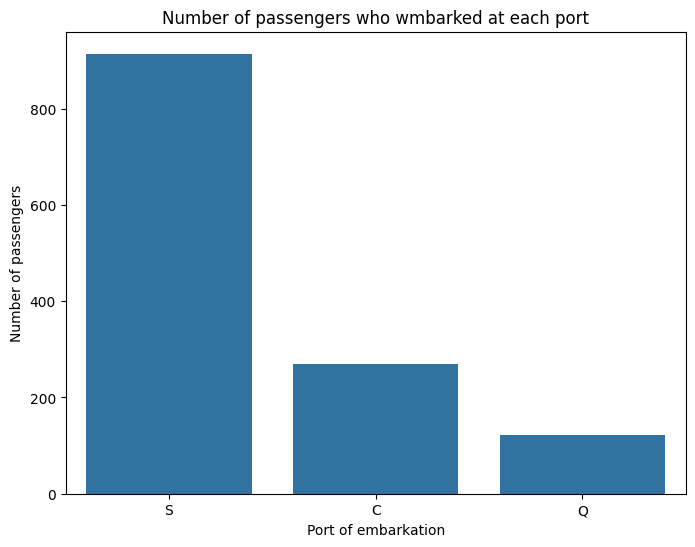

In [200]:
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=nobody_df)
plt.title('Number of passengers who wmbarked at each port')
plt.xlabel('Port of embarkation')
plt.ylabel('Number of passengers')
plt.show()

Most of the passengers boarded at port S, but we will explore further in the class section, as this is closely related to the class they boarded in. The class of passengers varied significantly by port, so there might be a high correlation between the two variables.

### Pclass

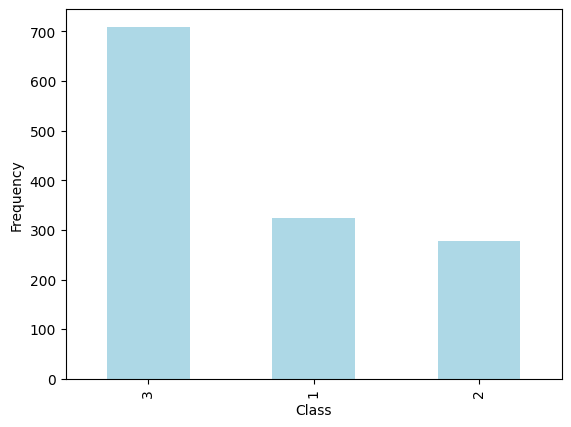

In [201]:
nobody_df['pclass'].value_counts().plot(kind='bar', edgecolor = 'none', color='lightblue')
plt.title('')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

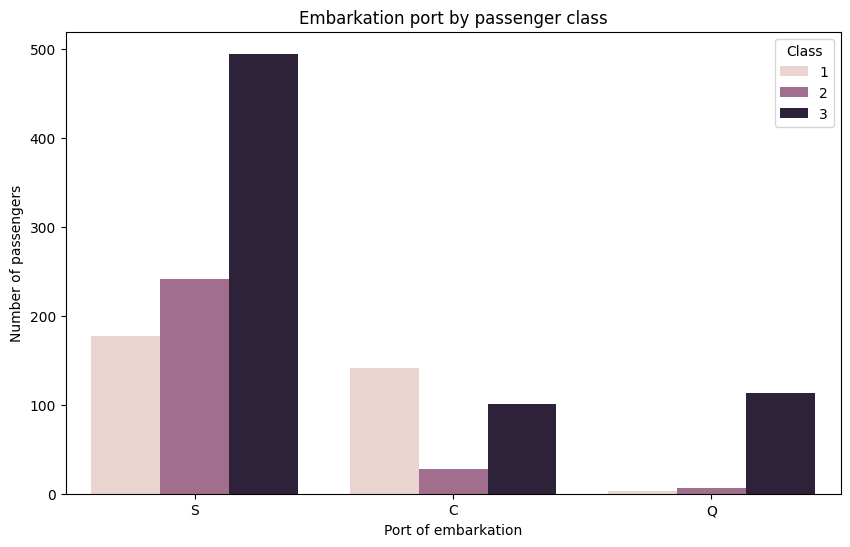

In [202]:
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', hue='pclass', data=nobody_df)

plt.title('Embarkation port by passenger class')
plt.xlabel('Port of embarkation')
plt.ylabel('Number of passengers')
plt.legend(title='Class')
plt.show()

In [203]:
embarked_class_counts = nobody_df.groupby('embarked')['pclass'].value_counts(normalize=True).unstack() * 100
embarked_class_counts.columns = ['Class 1 (%)', 'Class 2 (%)', 'Class 3 (%)']
print(embarked_class_counts.round(2))

          Class 1 (%)  Class 2 (%)  Class 3 (%)
embarked                                       
C               52.22        10.37        37.41
Q                2.44         5.69        91.87
S               19.37        26.48        54.16


As we mentioned, passengers from different classes did not board in equal proportions, and this distribution varies significantly depending on the port of embarkation

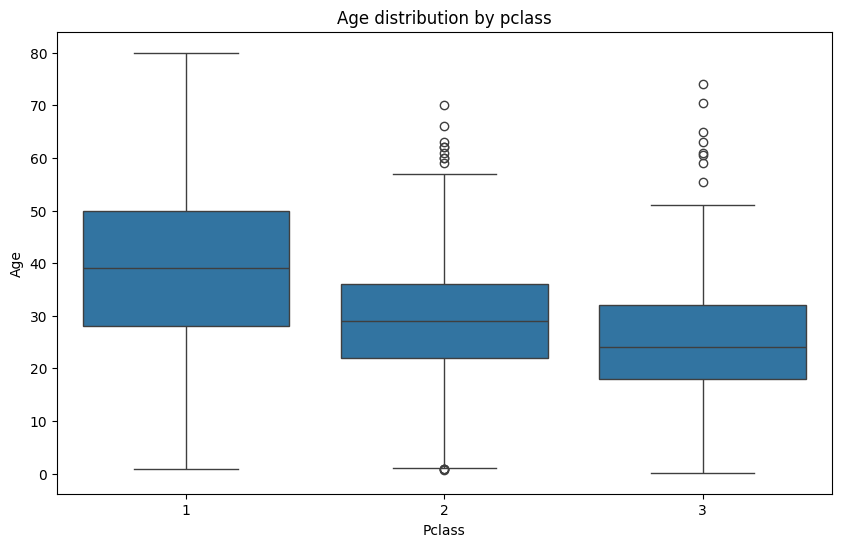

In [204]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='pclass', y='age', data=nobody_df)

plt.title('Age distribution by pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

Age is also related to class, older passengers tended to belong to higher classes. This suggests that as age increased, passengers were more likely to have been in the wealthier and more privileged groups.

### Boat

The boat variable in the Titanic dataset is considered data leakage because it directly correlates with the target variable survived, allowing the model to "cheat" by using future information that wouldn't be available at the time of prediction. 

However, just to mention, there are in total nine individual who have a boat assigned but did not survive.

In [205]:
in_boat = df[nobody_df['boat'].notnull()]
did_not_survive = in_boat[in_boat['survived'] == 0]

print(did_not_survive[['name', 'pclass', 'sex', 'age', 'boat', 'survived']])

                                                   name  pclass     sex   age  \
19                                 Beattie, Mr. Thomson       1    male  36.0   
166                            Hoyt, Mr. William Fisher       1    male   NaN   
544                             Renouf, Mr. Peter Henry       2    male  34.0   
655                          Backstrom, Mr. Karl Alfred       3    male  32.0   
853                  Harmer, Mr. Abraham (David Lishin)       3    male  25.0   
921                                   Keefe, Mr. Arthur       3    male   NaN   
968                       Lindell, Mr. Edvard Bengtsson       3    male  36.0   
969   Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...       3  female  30.0   
1299                                Yasbeck, Mr. Antoni       3    male  27.0   

     boat  survived  
19      A         0  
166    14         0  
544    12         0  
655     D         0  
853     B         0  
921     A         0  
968     A         0  
969     A    

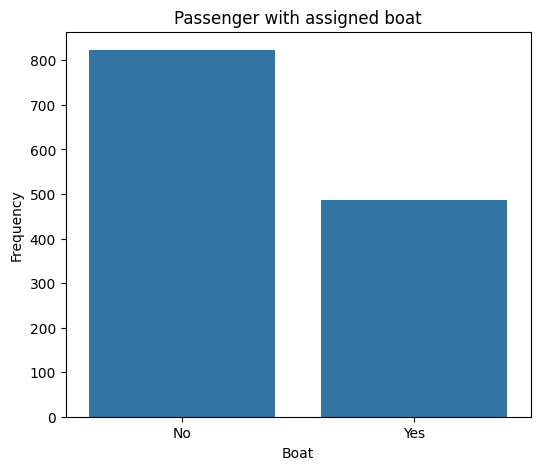

In [206]:
plt.figure(figsize=(6, 5))
nobody_df['has_boat'] = nobody_df['boat'].notna() 
sns.countplot(data=nobody_df, x='has_boat')
plt.title('Passenger with assigned boat')
plt.xlabel('Boat')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [207]:
noboat_df = nobody_df.drop(columns=['boat', 'has_boat'])
print(noboat_df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'alone', 'relatives'],
      dtype='object')


## Nominal Variables

- **name**
- **ticket**
- **home.dest**
- **cabin**

### Cabin

In [208]:
noboat_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'alone', 'relatives'],
      dtype='object')

In [209]:
unique_cabins = noboat_df['cabin'].unique()
print("Unique values in 'cabin':")
print(unique_cabins)


Unique values in 'cabin':
['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C

The first letter of the cabin indicates its height on the boat, with 'A' being the highest. This can provide insights into whether survival rates were linked to the cabins location.

In [210]:
def assign_value(cabin):
    letters_to_values = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8
    }
    
    if pd.isnull(cabin):  
        return -9999999
    else:
        first_letter = cabin[0]
        # here we assign the height or -9999999 to missing values
        return letters_to_values.get(first_letter, -9999999)  
    
noboat_df['height'] = noboat_df['cabin'].apply(assign_value)

The cabin column is dropped due to its lack of predictive power and tendency to lead to overfitting, especially considering the many missing values. Instead, we retain only the height feature for analysis.

In [211]:
nocabin_df = noboat_df.drop(columns=['cabin'])
print(nocabin_df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'home.dest', 'alone', 'relatives', 'height'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

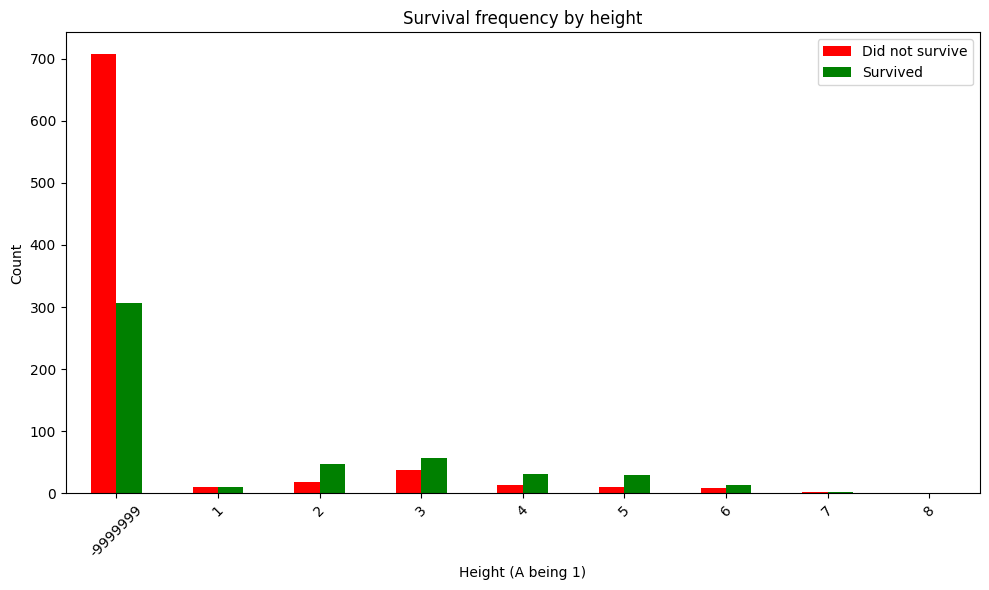

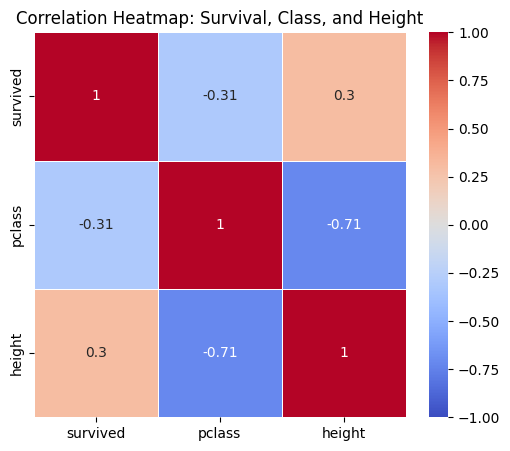

In [212]:
plt.figure(figsize=(10, 6))

height_survival_counts = nocabin_df.groupby(['height', 'survived']).size().unstack(fill_value=0)

height_survival_counts.plot(kind='bar', stacked=False, color=['red', 'green'], figsize=(10, 6))

plt.title('Survival frequency by height')
plt.xlabel('Height (A being 1)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Did not survive', 'Survived'])
plt.tight_layout()
plt.show()

correlation_data = nocabin_df[['survived', 'pclass', 'height']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Survival, Class, and Height')
plt.show()

As we can see, pclass and height have a high correlation. However, our current threshold for considering correlation is 0.75. This threshold may change as we analyze the correlation with other features. Both pclass and height seem to have a similar correlation with survival.

In [213]:
# relatives percentages of survival by height
height_survival_counts = nocabin_df.groupby(['height', 'survived']).size().unstack(fill_value=0)

height_survival_percentages = height_survival_counts.divide(height_survival_counts.sum(axis=1), axis=0) * 100

print(height_survival_percentages)

survived           0          1
height                         
-9999999   69.723866  30.276134
 1         50.000000  50.000000
 2         27.692308  72.307692
 3         39.361702  60.638298
 4         30.434783  69.565217
 5         26.829268  73.170732
 6         38.095238  61.904762
 7         40.000000  60.000000
 8        100.000000   0.000000


### Name

The name variable includes passenger information, but the actual textual content (e.g., full names) is not useful for predicting survival. However, certain parts of the name, like titles (Mr., Mrs., etc.), may carry some predictive value, which is why we extracted the title from the name. Since the full name is not directly useful for prediction and contains a lot of redundant information, I removed it, leaving the title as a more informative and simplified feature.

In [214]:
import re

def extract_title(name):
    if pd.isnull(name): 
        return 'Unknown'
    else:
        match = re.search(r'([A-Za-z]+)\.', name)
        if match:
            return match.group(1) 
        else:
            return 'Unknown'  

nocabin_df['title'] = nocabin_df['name'].apply(extract_title)

print(nocabin_df[['name', 'title']].head())


                                              name   title
0                    Allen, Miss. Elisabeth Walton    Miss
1                   Allison, Master. Hudson Trevor  Master
2                     Allison, Miss. Helen Loraine    Miss
3             Allison, Mr. Hudson Joshua Creighton      Mr
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs


In [215]:
unique_titles = nocabin_df['title'].unique()
print("Unique values in 'cabin':")
print(unique_titles)

Unique values in 'cabin':
['Miss' 'Master' 'Mr' 'Mrs' 'Col' 'Mme' 'Dr' 'Major' 'Capt' 'Lady' 'Sir'
 'Mlle' 'Dona' 'Jonkheer' 'Countess' 'Don' 'Rev' 'Ms']


In [216]:
# important title 0 or 1
important = ['Sir', 'Lady', 'Dr', 'Major', 'Capt', 'Rev', 'Countess', 'Dona']
not_important = ['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Mlle', 'Jonkheer', 'Don', 'Ms']

def assign_title_importance(title):
    if title in important:
        return 1
    elif title in not_important:
        return 0
    else:
        return 'Unknown'

nocabin_df['important_title'] = nocabin_df['title'].apply(assign_title_importance)

print(nocabin_df[['name', 'title', 'important_title']].head())

                                              name   title  important_title
0                    Allen, Miss. Elisabeth Walton    Miss                0
1                   Allison, Master. Hudson Trevor  Master                0
2                     Allison, Miss. Helen Loraine    Miss                0
3             Allison, Mr. Hudson Joshua Creighton      Mr                0
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs                0


In [217]:
noname_df = nocabin_df.drop(columns=['title', 'name'])
print(noname_df.columns)

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'home.dest', 'alone', 'relatives', 'height',
       'important_title'],
      dtype='object')


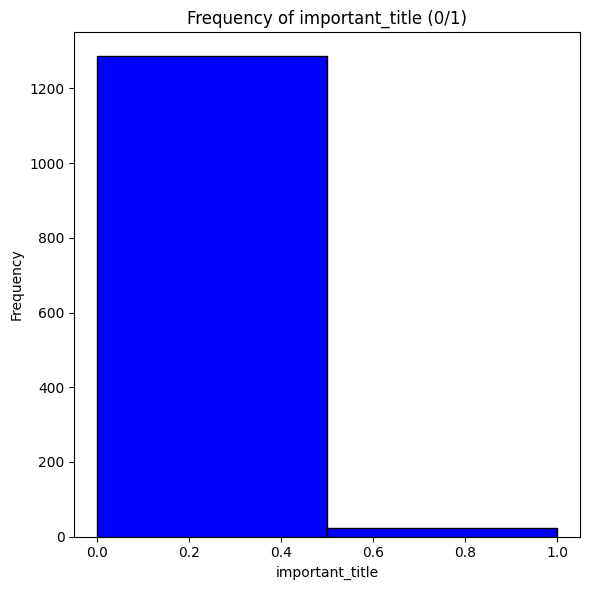

In [218]:
plt.figure(figsize=(6, 6))
plt.hist(noname_df['important_title'], bins=2, edgecolor='black', color='blue')
plt.title('Frequency of important_title (0/1)')
plt.xlabel('important_title')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [219]:
important_title_sex_table_percentage = pd.crosstab(
    [noname_df['important_title'], noname_df['sex']], 
    noname_df['survived'], 
    normalize='index'
) * 100

important_title_sex_table_percentage.columns = ['Did not survive (%)', 'Survived (%)']

print("\nPercentage distribution for 'important_title' by survival and sex:")
print(important_title_sex_table_percentage)



Percentage distribution for 'important_title' by survival and sex:
                        Did not survive (%)  Survived (%)
important_title sex                                      
0               female            27.489177     72.510823
                male              81.067961     18.932039
1               female             0.000000    100.000000
                male              73.684211     26.315789


The "important_title" variable can be very meaningful, especially when considering the "sex" feature. However, it can have a lot of correlation with pclass.

### Ticket and Home.dest

The ticket variable represents a shared ticket for all individuals traveling together, typically indicating families or groups of people. This makes the ticket variable highly similar to the relatives variable. Since relatives already captures the familial aspect of the passengers, ticket becomes redundant and doesn't provide additional predictive power and only introduces noise. The home.dest variable represents the combined information of the passenger's home and their final destination. However, it contains many unique values and, in many cases, seems to provide limited information for predicting survival. Given its high cardinality, inconsistency, and low predictive power, I decided to remove home.dest from the dataset to avoid introducing unnecessary noise into the model.

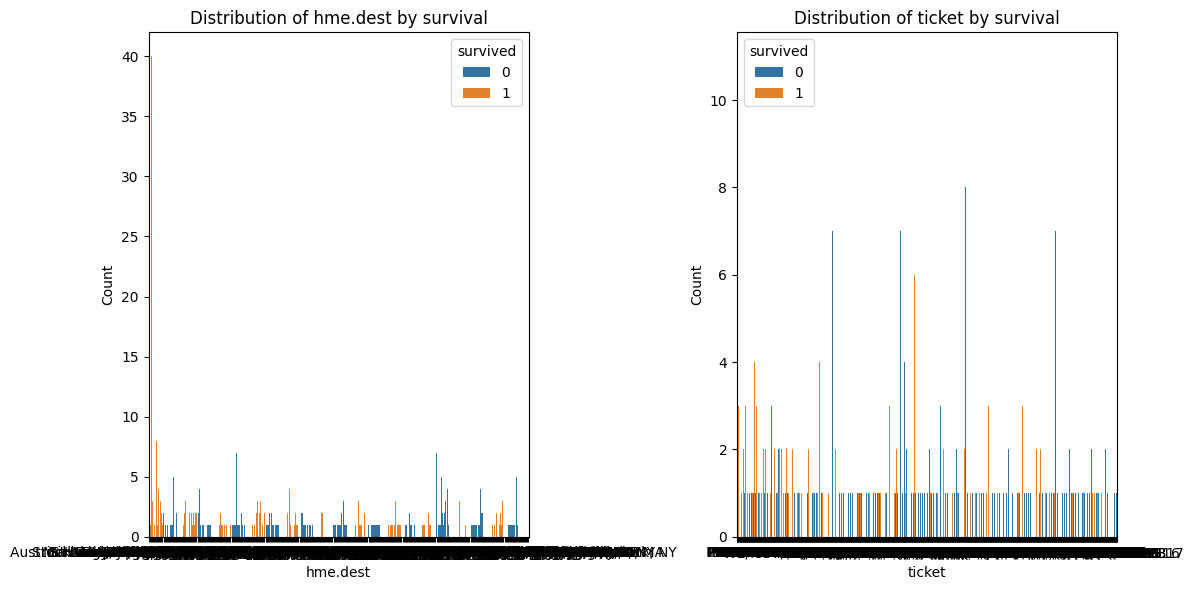

In [220]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='home.dest', hue='survived', data=noname_df)
plt.title('Distribution of hme.dest by survival')
plt.xlabel('hme.dest')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='ticket', hue='survived', data=noname_df)
plt.title('Distribution of ticket by survival')
plt.xlabel('ticket')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [221]:
noname_df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'home.dest', 'alone', 'relatives', 'height',
       'important_title'],
      dtype='object')

In [222]:
clean_df = noname_df.drop(columns=['ticket', 'home.dest'])
print(clean_df.columns)

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone', 'relatives', 'height', 'important_title'],
      dtype='object')


## Other Analysis

In [223]:
duplicates = df[clean_df.duplicated()]
duplicates = df[df.duplicated(subset=['name', 'pclass', 'sex', 'age'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []


No duplicates

- Is the data enough? 

    Yes, it provides sufficient features to analyze survival prediction.
- Is the data usable? 

    Yes, after some cleaning and preprocessing.
- Are the data tidy? (Lecture 1, Slide 14)  

    Not entirely. Some features require feature engineering 
- Are data tidy but incomplete? If yes, we need data imputation methods. 

    There are missing values (e.g., in age, embarked). Imputation is required.
- Are data tidy but with duplicates?  

  No duplicates detected.
- Are data tidy but expired or significantly out of date?  

    Not expired, data is from a historical event (Titanic).
- Are data tidy but incomplete or unrepresentative of the phenomenon? 

    Data is mostly representative but not fully clean.

- Do We Know the Source of Our Data?  

  Kaggle, unknown provenance, but trusted by lots of users.
- Were gender data manually inputted, or were they the result of a low-quality classifier?  
   
   No information.

- Is There Data Leakage?  Is the prediction target (implicitly) contained in the training dataset?  

    There was (boat, body), already removed.

- Are the Data Reliable? Can We Trust the Labels?  

    Labels are reliable, as they are based on real historical outcomes.

- Are labels delayed? We observe labels now but use them to predict far future events.  

  No delayed or indirect labels: survival is the direct outcome.

- Do we have feedback loops?  
    No feedback loops: The model doesn't train on its own predictions.


# Task 2: Managing Missing Values (1/2)
Lecture Material: Lecture 3, slides 22–24.
- Identify the columns containing missing values.
- Develop a strategy to address them.

In [224]:
missing_values = clean_df.isnull().sum()
print(missing_values)

pclass               0
survived             0
sex                  0
age                263
sibsp                0
parch                0
fare                 1
embarked             2
alone                0
relatives            0
height               0
important_title      0
dtype: int64


## Dealing with embarked missing values

In [225]:
missing_embarked = df[clean_df['embarked'].isnull()]
print(missing_embarked)

     pclass  survived                                       name     sex  \
168       1         1                        Icard, Miss. Amelie  female   
284       1         1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      age  sibsp  parch  ticket  fare cabin embarked boat  body  \
168  38.0      0      0  113572  80.0   B28      NaN    6   NaN   
284  62.0      0      0  113572  80.0   B28      NaN    6   NaN   

          home.dest  
168             NaN  
284  Cincinatti, OH  


Same ticket number, but not family. If we search in internet Icard, Miss. Amelie boarded at Southampton (https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) same for Stone, Mrs. George Nelson (Martha Evelyn) (https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

In [226]:
clean_df['embarked'] = clean_df['embarked'].fillna('S')
print(clean_df['embarked'].isnull().sum())  


0


# Task 5: Data Splitting
Lecture material: Lecture 2, slides 4–7.
- Split the dataset into training, validation, and test sets.
- Ensure that the split reflects the original distribution of the target variable using stratification.
Note: a good strategy is to first split the dataset into ‘training’ and ‘others’, and then split ‘others’ into equally
sized ‘validation’ and ‘test’ sets. When splitting sets, consider the argument stratify of the train test split
method.

For a dataset of 1300 examples, an 80-10-10 split is ideal because it provides enough training data while keeping the validation and test sets statistically meaningful. A 90% training split is better for very small datasets (Under 1000 examples), where cross-validation can replace a separate validation set. On the other hand, a 70% training split is more common when working with large datasets, where validation and test sets need more examples for reliable evaluation. Since 1300 is a small/mid-sized dataset, 80% training ensures the model learns well, while 10% validation and 10% test provide decent performance metrics.

In [227]:
# Strategy 80-20 and then 50-50 on the 20 making: 80-10-10
train_df, others_df = sklearn.model_selection.train_test_split(clean_df, test_size=0.2, stratify=df['survived'], random_state=2025)
valid_df, test_df = sklearn.model_selection.train_test_split(others_df, test_size=0.5, stratify=others_df['survived'], random_state=2025)

In [228]:
# check proportion of survival, should be equal
print('Train set distribution:')
print(train_df['survived'].value_counts(normalize=True))

print('\nValidation set distribution:')
print(valid_df['survived'].value_counts(normalize=True))

print('\nTest set distribution:')
print(test_df['survived'].value_counts(normalize=True))

Train set distribution:
survived
0    0.617956
1    0.382044
Name: proportion, dtype: float64

Validation set distribution:
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64

Test set distribution:
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


# Task 2: Managing Missing Values (2/2)
Lecture Material: Lecture 3, slides 22–24.
- Identify the columns containing missing values.
- Develop a strategy to address them.

In [229]:
# train
t_missing_values = train_df.isnull().sum()
print(t_missing_values)
print('-----------------------------------------')

# validate
v_missing_values = valid_df.isnull().sum()
print(v_missing_values)
print('-----------------------------------------')

#test
ts_missing_values = test_df.isnull().sum()
print(ts_missing_values)

pclass               0
survived             0
sex                  0
age                203
sibsp                0
parch                0
fare                 1
embarked             0
alone                0
relatives            0
height               0
important_title      0
dtype: int64
-----------------------------------------
pclass              0
survived            0
sex                 0
age                29
sibsp               0
parch               0
fare                0
embarked            0
alone               0
relatives           0
height              0
important_title     0
dtype: int64
-----------------------------------------
pclass              0
survived            0
sex                 0
age                31
sibsp               0
parch               0
fare                0
embarked            0
alone               0
relatives           0
height              0
important_title     0
dtype: int64


## Dealing with age missing values

The most interesting approach is to group the data by class and sex, and then calculate the mean of the features. We use these average values from the training set to fill in the missing values in both the validation and test sets. KNN could also have been used.

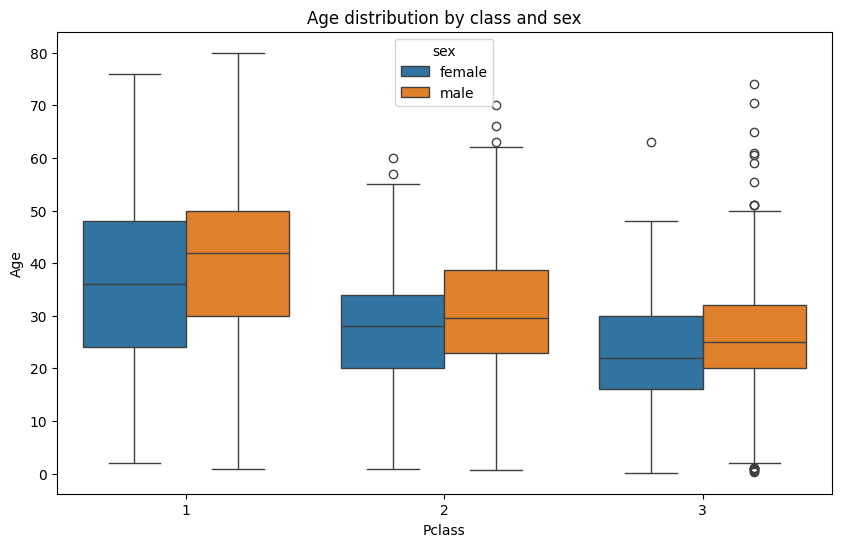

In [230]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='pclass', y='age', hue='sex', data=clean_df)
plt.title('Age distribution by class and sex')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.show()

In [231]:
def fill_missing_age(df, age_grouped):
    def fill_age(row):
        if pd.isna(row['age']):
            # get the mean age for the corresponding pclass and sex from the grouped data
            mean_age = age_grouped[
                (age_grouped['pclass'] == row['pclass']) &
                (age_grouped['sex'] == row['sex'])
            ]['age']
            
            if not mean_age.empty:
                return mean_age.values[0]
            else:
                return 'Unknown' 
        else:
            return row['age']  
    
    # apply the fill_age function to the entire dataset
    df['age'] = df.apply(fill_age, axis=1)
    
    return df

age_grouped_train = train_df.groupby(['pclass', 'sex'])['age'].mean().reset_index()
print('Mean ages by pclass and sex in train_df:')
print(age_grouped_train)

for dataset_name, dataset in [('train', train_df), ('valid', valid_df), ('test', test_df)]:
    print(f"\nFilling missing values in 'age' for {dataset_name} set:")
    # check how many missing values
    print(f"Missing values in 'age' for {dataset.shape[0]} entries: {dataset['age'].isnull().sum()}")
    
    # only fill  values in valid and test sets using values from train_df
    dataset = fill_missing_age(dataset, age_grouped_train)
    
    # check again how many missing values
    print(f"Missing values in 'age' after fill: {dataset['age'].isnull().sum()}")
    print(dataset.head())




Mean ages by pclass and sex in train_df:
   pclass     sex        age
0       1  female  36.711712
1       1    male  40.889108
2       2  female  26.968107
3       2    male  31.017811
4       3  female  22.442623
5       3    male  26.022365

Filling missing values in 'age' for train set:
Missing values in 'age' for 1047 entries: 203
Missing values in 'age' after fill: 0
     pclass  survived     sex        age  sibsp  parch    fare embarked  \
829       3         0  female  16.000000      5      2  46.900        S   
889       3         1    male  26.000000      0      0   7.775        S   
330       2         0    male  57.000000      0      0  13.000        S   
91        1         1    male  31.000000      1      0  57.000        S   
808       3         0    male  26.022365      0      0   8.050        S   

     alone  relatives   height  important_title  
829      0          7 -9999999                0  
889      1          0 -9999999                0  
330      1          0 -

## Dealing with fare missing values

To estimate the missing fare values, I first looked for passengers with similar characteristics: same class and embarked from the same port. After identifying similar passengers, I analyzed their fare distribution and found that most paid between 7 and 10, with one clear outlier. Based on that, I decided the median fare was the best estimate. Finally, I searched online and found that Storey, Mr. Thomas paid exactly 7 pounds for his ticket (https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html). 

1


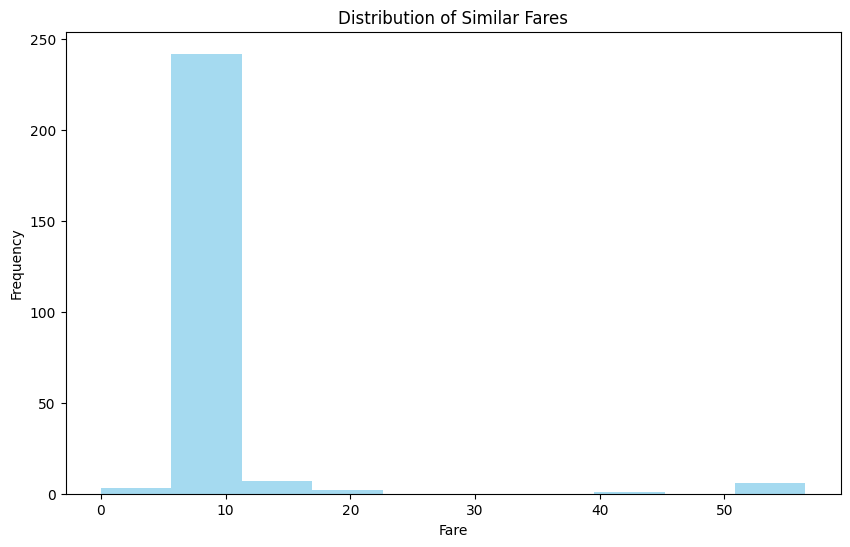

In [232]:
def get_similar_fares(train_df, passenger_index):
    passenger = train_df.loc[passenger_index]
    
    similar_passengers = train_df[
        (train_df['pclass'] == passenger['pclass']) & 
        (train_df['embarked'] == passenger['embarked']) & 
        (train_df['sibsp'] == passenger['sibsp']) &  
        (train_df['parch'] == passenger['parch'])  
    ]
    similar_passengers = similar_passengers[similar_passengers['fare'].notnull()]
    
    return similar_passengers['fare'].tolist()

for index in train_df[train_df['fare'].isnull()].index:
    similar_fares = get_similar_fares(train_df, index)

print(train_df['fare'].isnull().sum())  # Should be 0

plt.figure(figsize=(10, 6))
sns.histplot(similar_fares, bins=10, color='skyblue', edgecolor='none')
plt.title('Distribution of Similar Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [233]:
missing_fare_rows = df[df['fare'].isna()]
print('Passengers without an assigned fare:')
print(missing_fare_rows)

Passengers without an assigned fare:
      pclass  survived                name   sex   age  sibsp  parch ticket  \
1225       3         0  Storey, Mr. Thomas  male  60.5      0      0   3701   

      fare cabin embarked boat   body home.dest  
1225   NaN   NaN        S  NaN  261.0       NaN  


In [234]:
train_df['fare'] = train_df['fare'].fillna(7)

In [235]:
# train
t_missing_values = train_df.isnull().sum()
print(t_missing_values)
print('-----------------------------------------')

# validate
v_missing_values = valid_df.isnull().sum()
print(v_missing_values)
print('-----------------------------------------')

#test
ts_missing_values = test_df.isnull().sum()
print(ts_missing_values)

pclass             0
survived           0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
alone              0
relatives          0
height             0
important_title    0
dtype: int64
-----------------------------------------
pclass             0
survived           0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
alone              0
relatives          0
height             0
important_title    0
dtype: int64
-----------------------------------------
pclass             0
survived           0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
alone              0
relatives          0
height             0
important_title    0
dtype: int64


No more missing values!

# Task 3: Encoding Categorical Variables
Lecture material: Lecture 4, slides 10–15, 21.
- Identify the categorical variables in the dataset.
- Utilize OneHotEncoder to encode them.
- Observe the transformation and discuss its impact on machine learning models

I applied one-hot encoding to the sex and embarked columns because they are categorical variables without an hierarchical order, allowing ML models to treat them as distinct categories rather than numerical values. On the other hand, variables like pclass represent a hierarchical order, so encoding them as separate categories would break their structure, not allowing the model to learn correctly.


Encoding categorical variables is crucial for machine learning models, as most algorithms require numerical input. By transforming categorical features into numerical values, models can identify patterns and relationships. One-hot encoding, creates binary columns for each category, which helps the model recognize each category as a separate entity. However, it's important to note that this can increase dimensionality, and if the dataset contains many categories, it could make the model prone to overfitting. 

In [236]:
categorical_cols = ['sex', 'embarked']

encoder = sklearn.preprocessing.OneHotEncoder(drop='first', sparse_output=False)

# Encoding..
train_encoded = encoder.fit_transform(train_df[categorical_cols])
test_encoded = encoder.transform(test_df[categorical_cols])
valid_encoded = encoder.transform(valid_df[categorical_cols])

# Remake the df
encoded_cols = encoder.get_feature_names_out(categorical_cols)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=test_df.index)
valid_encoded_df = pd.DataFrame(valid_encoded, columns=encoded_cols, index=valid_df.index)

# Merge the df
train_df = pd.concat([train_df.drop(columns=categorical_cols), train_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=categorical_cols), test_encoded_df], axis=1)
valid_df = pd.concat([valid_df.drop(columns=categorical_cols), valid_encoded_df], axis=1)

# just check
print(train_df.head())
print(valid_df.head())
print(test_df.head())


     pclass  survived        age  sibsp  parch    fare  alone  relatives  \
829       3         0  16.000000      5      2  46.900      0          7   
889       3         1  26.000000      0      0   7.775      1          0   
330       2         0  57.000000      0      0  13.000      1          0   
91        1         1  31.000000      1      0  57.000      0          1   
808       3         0  26.022365      0      0   8.050      1          0   

      height  important_title  sex_male  embarked_Q  embarked_S  
829 -9999999                0       0.0         0.0         1.0  
889 -9999999                0       1.0         0.0         1.0  
330 -9999999                0       1.0         0.0         1.0  
91         2                0       1.0         0.0         1.0  
808 -9999999                0       1.0         0.0         1.0  
     pclass  survived   age  sibsp  parch     fare  alone  relatives   height  \
687       3         0  20.0      0      0   7.8542      1         

# Task 4: Feature Scaling
Lecture material: Lecture 5, slides 14–20.
- Standardize the numerical variables using StandardScaler.
- Normalize the numerical variables using MinMaxScaler.
- Discuss the differences between standardization and normalization, along with their importance

Feature scaling, in general, is important because it ensures that no individual feature dominates the model due to its scale, and it allows the model to learn from all features equally and prevents features with larger scales (like fare) from dominating the learning process. For this model, standarization is a better choice than normalization. This is becouse logistic regression is sensitive to the variance of the features and standarization escales the data to have a mean of 0 and a standard deviation of 1. Standardization works particularly well when your data is approximately normally distributed, which is often the case for numerical features like age, fare, or sibsp in real-world datasets.

On the other hand, normalization, rescales the data to a fixed range, typically [0, 1]. This method is useful when the absolute magnitude of the features matters. However, normalization can be affected by outliers, which can make smaller the range of normal values and impact the model performance.

In [237]:
print(train_df.dtypes)
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'relatives']

pclass               int64
survived             int64
age                float64
sibsp                int64
parch                int64
fare               float64
alone                int64
relatives            int64
height               int64
important_title      int64
sex_male           float64
embarked_Q         float64
embarked_S         float64
dtype: object


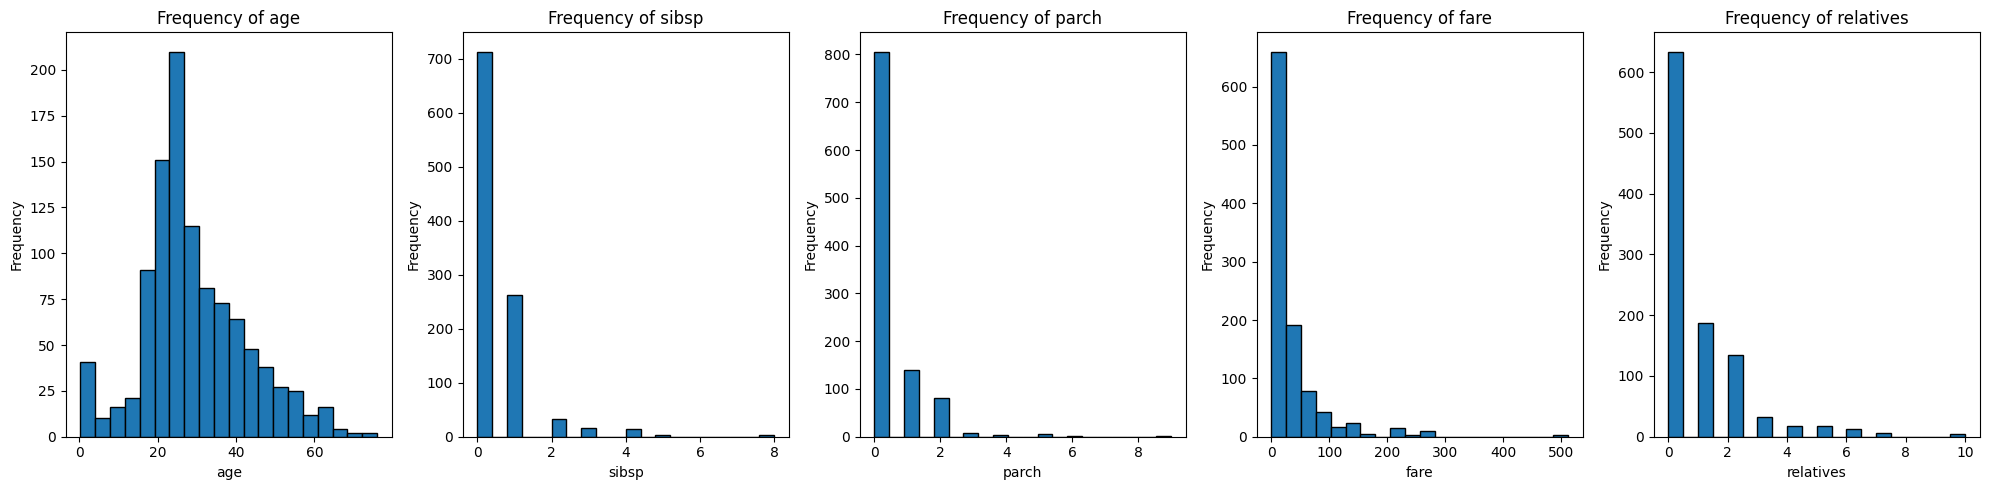

In [238]:
# plot each numerical distribution
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(numerical_columns):
    axes[i].hist(train_df[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [239]:
# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_df[numerical_columns])

train_df[numerical_columns] = scaler.transform(train_df[numerical_columns])
valid_df[numerical_columns] = scaler.transform(valid_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# verify
print('Train set after scaling:')
print(train_df[numerical_columns].head())

print('\nValidation set after scaling:')
print(valid_df[numerical_columns].head())

print('\nTest set after scaling:')
print(test_df[numerical_columns].head())


Train set after scaling:
          age     sibsp     parch      fare  relatives
829 -1.038419  5.039298  1.830957  0.247731   4.212663
889 -0.268845 -0.509866 -0.428338 -0.500739  -0.573356
330  2.116833 -0.509866 -0.428338 -0.400783  -0.573356
91   0.115942  0.599967 -0.428338  0.440946   0.110361
808 -0.267124 -0.509866 -0.428338 -0.495478  -0.573356

Validation set after scaling:
          age     sibsp     parch      fare  relatives
687 -0.730589 -0.509866 -0.428338 -0.499224  -0.573356
664 -0.730589 -0.509866 -0.428338 -0.511180  -0.573356
935 -0.037973  2.819632  0.701309 -0.228133   2.161512
133  1.501174  0.599967 -0.428338  1.055107   0.110361
339 -2.192779  1.709800  0.701309  0.096602   1.477795

Test set after scaling:
           age     sibsp     parch      fare  relatives
144  -0.345802  0.599967 -0.428338  0.411136   0.110361
1177 -0.267124  8.368796  1.830957  0.681030   6.263814
116   2.347705  0.599967  4.090253  4.381771   2.845229
620   0.192899 -0.509866 -0.428338 

# Task 6: Addressing Class Imbalance
Lecture material: Lecture 3, slides 25–27; Lecture 4, slides 4–5.
- Apply a method to address class imbalance (e.g., Oversampling Technique (SMOTE), Adaptive Synthetic
Sampling Method (ADASYN)).
Note: You can load a SMOTE and/or ADASYN implementation from the Python module imblearn.



Balancing the classes is important because if one class is significantly more common than the other, the model might learn to favor the majority class and ignore the minority class. This can lead to poor performance, especially when predicting the less frequent outcomes. I chose SMOTE because it generates samples for the minority class by "blending" existing data points, helping to create a more balanced and representative dataset.

In [240]:
from imblearn.over_sampling import SMOTE

X_train = train_df.drop('survived', axis=1) 
y_train = train_df['survived']  

smote = SMOTE(sampling_strategy='auto', random_state=2025) 
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f'Original class distribution in training set: {y_train.value_counts()}')
print(f'Resampled class distribution in training set: {y_train_res.value_counts()}')

Original class distribution in training set: survived
0    647
1    400
Name: count, dtype: int64
Resampled class distribution in training set: survived
0    647
1    647
Name: count, dtype: int64


# Task 7: Feature Selection
Lecture material: Lecture 5, slides 10–14, 19.
- Eliminate low variance and highly correlated features.
- Why do we carry out tasks 6 and 7 after splitting the dataset into training, validation, and test sets? Could
we have conducted them on the entire dataset instead? Please elaborate on your answer.

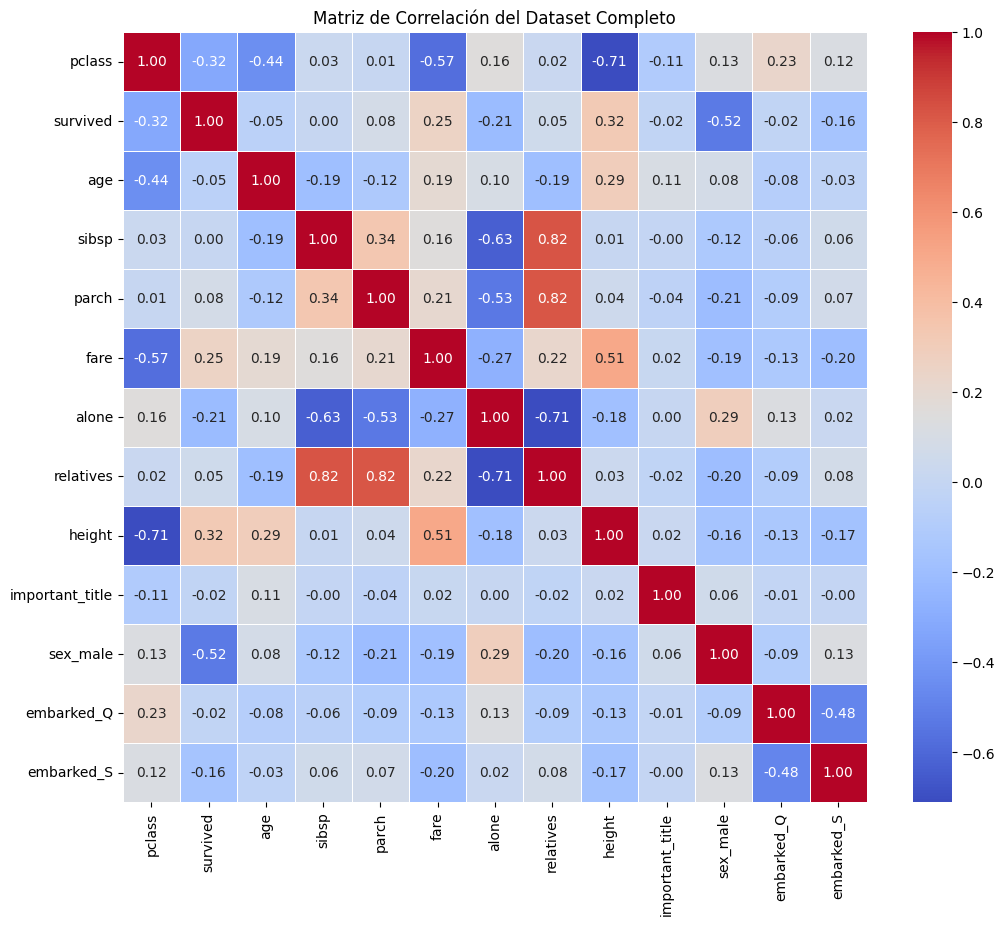

In [241]:
# correlation matrix
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación del Dataset Completo')
plt.show()

In [242]:
# low variance
def remove_low_variance_features(df, threshold=0.1):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f'Low variance features removed: {low_variance_features}')
    return df_cleaned

# highly correlated features
def remove_highly_correlated_features(df, correlation_threshold=0.5):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f'Highly correlated features removed: {to_drop}')
    return df_cleaned

X_train = remove_low_variance_features(X_train) 
X_train = remove_highly_correlated_features(X_train)  

print(X_train.head())


Low variance features removed: ['important_title', 'embarked_Q']
Highly correlated features removed: ['fare', 'alone', 'relatives', 'height']
     pclass       age     sibsp     parch  sex_male  embarked_S
829       3 -1.038419  5.039298  1.830957       0.0         1.0
889       3 -0.268845 -0.509866 -0.428338       1.0         1.0
330       2  2.116833 -0.509866 -0.428338       1.0         1.0
91        1  0.115942  0.599967 -0.428338       1.0         1.0
808       3 -0.267124 -0.509866 -0.428338       1.0         1.0


Features with low variance, such as important_title and embarked_Q, don’t provide meaningful information because they remain mostly constant across the dataset. If a feature doesn’t vary much, it won’t help the model differentiate between classes, so I set a variance threshold of 0.1 to automatically drop such features.

Additionally, I removed highly correlated features like fare, alone, relatives, and height to prevent multicollinearity. When two features have a correlation above 0.5, they likely contain redundant information, meaning keeping both could make the model more complex without adding real value. Interestingly, most of these were features I created, which suggests that they captured relationships already present in other variables. 

We balance the classes and select features after splitting the data to avoid data leakage. If we balanced the classes before splitting, we might end up with synthetic or resampled data in both training and test sets, making the model look better than it actually is. Keeping balancing only in the training set ensures that our validation and test sets remain truly unseen.

Feature selection works the same way. If we analyze the whole dataset before splitting, we might pick features that seem important only because they correlate with patterns in the test data. This could lead to overfitting, where the model does well in training but struggles with new data. By selecting features only from the training set, we make sure the model learns from real patterns without accidentally using future information. 

# Task 8: Training a Logistic Regression Model
Lecture material: Lecture 6, slides 5–9.
- Train a Logistic Regression Model to predict whether a passenger survives.
Note: Use the method predict from the class LogisticRegression with the validation set. Have fun finding
a visually appealing way to display the results of the predictions on the validation set. An analysis of model
performance is not required and will not affect your final grade for the assignment. However, I won’t stop you from
including it. 8-)

In [243]:
X_valid = valid_df.drop(columns=['survived', 'important_title', 'embarked_Q', 'relatives', 'fare', 'alone', 'height' ])
X_valid.head()
y_valid = valid_df['survived']
y_valid.head()

687    0
664    1
935    1
133    1
339    1
Name: survived, dtype: int64

In [244]:
X_train.head()

,pclass,age,sibsp,parch,sex_male,embarked_S
829,3,-1.038419,5.039298,1.830957,0.0,1.0
889,3,-0.268845,-0.509866,-0.428338,1.0,1.0
330,2,2.116833,-0.509866,-0.428338,1.0,1.0
91,1,0.115942,0.599967,-0.428338,1.0,1.0
808,3,-0.267124,-0.509866,-0.428338,1.0,1.0


In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# logistric regression
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=2024)

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_valid)


print(f'Predictions on the validation set: {y_pred}')

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy on the validation set: {accuracy:.4f}')

Predictions on the validation set: [1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0]
Accuracy on the validation set: 0.8168


Accuracy on the validation set: 0.8168


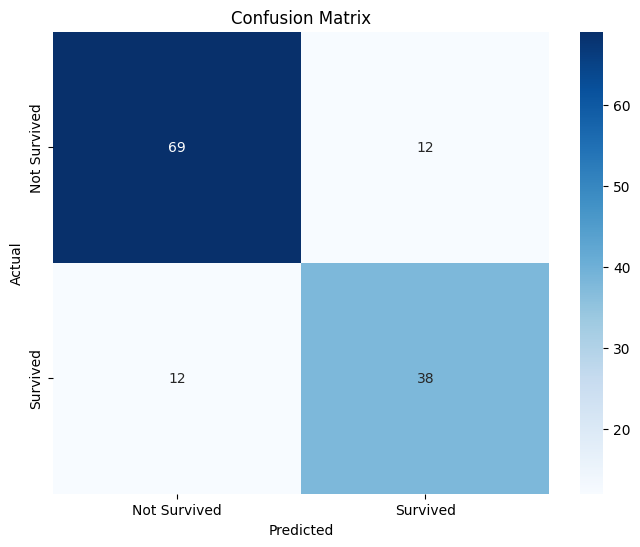

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        81
           1       0.76      0.76      0.76        50

    accuracy                           0.82       131
   macro avg       0.81      0.81      0.81       131
weighted avg       0.82      0.82      0.82       131



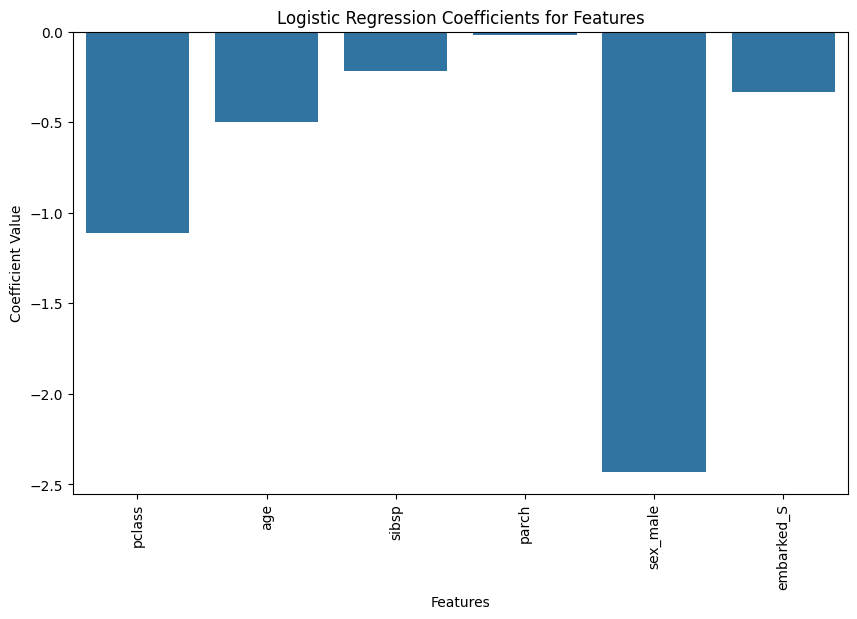

Done


In [ ]:
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy on the validation set: {accuracy:.4f}')

# confusion matrix and coefficient values
conf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_valid, y_pred)
print(f'Classification Report:\n{class_report}')
coefficients = logreg_model.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients)
plt.title('Logistic Regression Coefficients for Features')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

print("Done")


Finally we train the model and get a decent acuracy of 81.68%. 

# Conclusion

**Steps:**
1. Data Loading & Exploration: I loaded the Titanic dataset, performed EDA, and visualized key relationships between variables like age, sex, and survival.

2. Managing Missing Values: I handled missing age values by filling them with the mean or searching in internet.

3. Encoding Categorical Variables: I used OneHotEncoder to encode categorical variables like sex and embarked.

4. Feature Scaling: I applied both StandardScaler to standardize numerical features for better model performance.

5. Data Splitting: The data was split into training, validation, and test sets: 80, 10, 10.

6. Addressing Class Imbalance: ADASYN was used to oversample the minority class and address class imbalance.

7. Feature Selection: I removed low variance and highly correlated features, such as important_title and fare, to improve model performance.

8. Model Training: Logistic Regression model was trained on the processed data.


**Observations**
- Data leakage is hard, specially managing the order of the pipeline
- Creating new features doesnt always mean better performance

# LOGs

Run 1: 0.82
- Variable: pclass, age, sibsp, parch, sex_male, embarked_S
- Variance threshold: 0.2
- Correlation threshold: 0.5
- ADASYN + Standarization

Run 2:  0.8015
- Variable: pclass, age, sibsp, parch, sex_male, embarked_S, alone, fare
- Variance threshold: 0.1
- Correlation threshold: 0.7
- ADASYN + Standarization

Run 3: 0.8321
- Variable: pclass, sibsp, sex_male, alone
- Variance threshold: 0.1
- Correlation threshold: 0.7
- ADASYN + Standarization